In [ ]:
# Install required packages (run this cell first)

import requests
import pandas as pd
import numpy as np
import datetime

# Setting display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

print("✅ Setup completed - all libraries imported")


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Setup completed - all libraries imported


In [2]:
# Define all helper functions in one cell
def getBoosterVersion(data):
    """Get booster version names from rocket IDs"""
    BoosterVersion = []
    for x in data['rocket']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
            BoosterVersion.append(response['name'])
    return BoosterVersion

def getLaunchSite(data):
    """Get launch site details from launchpad IDs"""
    Longitude = []
    Latitude = []
    LaunchSite = []
    for x in data['launchpad']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
            Longitude.append(response['longitude'])
            Latitude.append(response['latitude'])
            LaunchSite.append(response['name'])
    return Longitude, Latitude, LaunchSite

def getPayloadData(data):
    """Get payload mass and orbit information"""
    PayloadMass = []
    Orbit = []
    for load in data['payloads']:
        if load:
            response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
            PayloadMass.append(response['mass_kg'])
            Orbit.append(response['orbit'])
    return PayloadMass, Orbit

def getCoreData(data):
    """Get core/stage 1 landing and reuse data"""
    Block = []
    ReusedCount = []
    Serial = []
    Outcome = []
    Flights = []
    GridFins = []
    Reused = []
    Legs = []
    LandingPad = []
    
    for core in data['cores']:
        if core['core'] is not None:
            response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
            Block.append(response['block'])
            ReusedCount.append(response['reuse_count'])
            Serial.append(response['serial'])
        else:
            Block.append(None)
            ReusedCount.append(None)
            Serial.append(None)
        Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
        Flights.append(core['flight'])
        GridFins.append(core['gridfins'])
        Reused.append(core['reused'])
        Legs.append(core['legs'])
        LandingPad.append(core['landpad'])
    
    return Block, ReusedCount, Serial, Outcome, Flights, GridFins, Reused, Legs, LandingPad

print("✅ Helper functions defined")

✅ Helper functions defined


In [3]:
print("🛰️  Starting SpaceX data collection...")

# Get data from SpaceX API
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)

print(f"📡 API Response Status: {response.status_code}")

# Convert JSON to DataFrame
data = pd.json_normalize(response.json())

print("✅ Raw data collected")
print(f"📊 Original data shape: {data.shape}")
print("\nFirst 3 rows of raw data:")
print(data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']].head(3))

🛰️  Starting SpaceX data collection...
📡 API Response Status: 200
✅ Raw data collected
📊 Original data shape: (107, 42)

First 3 rows of raw data:
                     rocket  \
0  5e9d0d95eda69955f709d1eb   
1  5e9d0d95eda69955f709d1eb   
2  5e9d0d95eda69955f709d1eb   

                                               payloads  \
0                            [5eb0e4b5b6c3bb0006eeb1e1]   
1                            [5eb0e4b6b6c3bb0006eeb1e2]   
2  [5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]   

                  launchpad  \
0  5e9e4502f5090995de566f86   
1  5e9e4502f5090995de566f86   
2  5e9e4502f5090995de566f86   

                                                                                                                                                                                              cores  \
0  [{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_ty

In [4]:
print("\n" + "="*50)
print("🔄 Starting data preprocessing...")

# Keep only necessary columns
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# Remove rows with multiple cores or payloads
data = data[data['cores'].map(len) == 1]
data = data[data['payloads'].map(len) == 1]

print(f"📊 After removing multi-core/payload launches: {data.shape}")

# Extract single values from lists
data['cores'] = data['cores'].map(lambda x: x[0])
data['payloads'] = data['payloads'].map(lambda x: x[0])

# Convert and filter dates
data['date'] = pd.to_datetime(data['date_utc']).dt.date
data = data[data['date'] <= datetime.date(2020, 11, 13)]

print(f"📊 After date filtering: {data.shape}")
print("✅ Data preprocessing completed")

print("\nProcessed data sample:")
print(data.head())


🔄 Starting data preprocessing...
📊 After removing multi-core/payload launches: (95, 6)
📊 After date filtering: (94, 7)
✅ Data preprocessing completed

Processed data sample:
                     rocket                  payloads  \
0  5e9d0d95eda69955f709d1eb  5eb0e4b5b6c3bb0006eeb1e1   
1  5e9d0d95eda69955f709d1eb  5eb0e4b6b6c3bb0006eeb1e2   
3  5e9d0d95eda69955f709d1eb  5eb0e4b7b6c3bb0006eeb1e5   
4  5e9d0d95eda69955f709d1eb  5eb0e4b7b6c3bb0006eeb1e6   
5  5e9d0d95eda69973a809d1ec  5eb0e4b7b6c3bb0006eeb1e7   

                  launchpad  \
0  5e9e4502f5090995de566f86   
1  5e9e4502f5090995de566f86   
3  5e9e4502f5090995de566f86   
4  5e9e4502f5090995de566f86   
5  5e9e4501f509094ba4566f84   

                                                                                                                                                                                            cores  \
0  {'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': F

In [5]:
print("\n" + "="*50)
print("🔍 Collecting enhanced rocket data...")

# Get all enhanced data using our helper functions
print("📡 Getting booster versions...")
BoosterVersion = getBoosterVersion(data)

print("📡 Getting launch site data...")
Longitude, Latitude, LaunchSite = getLaunchSite(data)

print("📡 Getting payload data...")
PayloadMass, Orbit = getPayloadData(data)

print("📡 Getting core data...")
Block, ReusedCount, Serial, Outcome, Flights, GridFins, Reused, Legs, LandingPad = getCoreData(data)

# Create the final dataset
launch_dict = {
    'FlightNumber': list(data['flight_number']),
    'Date': list(data['date']),
    'BoosterVersion': BoosterVersion,
    'PayloadMass': PayloadMass,
    'Orbit': Orbit,
    'LaunchSite': LaunchSite,
    'Outcome': Outcome,
    'Flights': Flights,
    'GridFins': GridFins,
    'Reused': Reused,
    'Legs': Legs,
    'LandingPad': LandingPad,
    'Block': Block,
    'ReusedCount': ReusedCount,
    'Serial': Serial,
    'Longitude': Longitude,
    'Latitude': Latitude
}

df = pd.DataFrame(launch_dict)

print("✅ Enhanced data collection completed")
print(f"📊 Final dataset shape: {df.shape}")

print("\nEnhanced data sample:")
print(df.head())


🔍 Collecting enhanced rocket data...
📡 Getting booster versions...


📡 Getting launch site data...
📡 Getting payload data...
📡 Getting core data...
✅ Enhanced data collection completed
📊 Final dataset shape: (94, 17)

Enhanced data sample:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0             1  2006-03-24       Falcon 1         20.0   LEO   
1             2  2007-03-21       Falcon 1          NaN   LEO   
2             4  2008-09-28       Falcon 1        165.0   LEO   
3             5  2009-07-13       Falcon 1        200.0   LEO   
4             6  2010-06-04       Falcon 9          NaN   LEO   

        LaunchSite    Outcome  Flights  GridFins  Reused   Legs LandingPad  \
0  Kwajalein Atoll  None None        1     False   False  False       None   
1  Kwajalein Atoll  None None        1     False   False  False       None   
2  Kwajalein Atoll  None None        1     False   False  False       None   
3  Kwajalein Atoll  None None        1     False   False  False       None   
4     CCSFS SLC 40  None None        1     False

In [6]:
print("\n" + "="*50)
print("🧹 Starting final data cleaning...")

# Task 2: Filter for Falcon 9 only
print("🚀 Filtering for Falcon 9 launches...")
data_falcon9 = df[df['BoosterVersion'] != 'Falcon 1']
print(f"📊 After Falcon 1 removal: {data_falcon9.shape}")

# Reset FlightNumber
data_falcon9 = data_falcon9.copy()
data_falcon9.loc[:, 'FlightNumber'] = list(range(1, data_falcon9.shape[0] + 1))

# Check missing values
print("\n🔍 Missing values before cleaning:")
print(data_falcon9.isnull().sum())


🧹 Starting final data cleaning...
🚀 Filtering for Falcon 9 launches...
📊 After Falcon 1 removal: (90, 17)

🔍 Missing values before cleaning:
FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64


In [7]:
# Task 3: Handle missing values in PayloadMass
print("\n📊 Handling missing PayloadMass values...")
payload_mean = data_falcon9['PayloadMass'].mean()
print(f"📏 Mean PayloadMass: {payload_mean:.2f} kg")

data_falcon9['PayloadMass'] = data_falcon9['PayloadMass'].replace(np.nan, payload_mean)

print("\n✅ Missing values after cleaning:")
print(data_falcon9.isnull().sum())


📊 Handling missing PayloadMass values...
📏 Mean PayloadMass: 6123.55 kg

✅ Missing values after cleaning:
FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64


In [8]:
# Save to CSV
print("\n💾 Saving to CSV file...")
data_falcon9.to_csv('dataset_part_1.csv', index=False)

# Final summary
print("\n" + "="*50)
print("🎉 DATA COLLECTION COMPLETED!")
print(f"📁 File saved: dataset_part_1.csv")
print(f"📊 Final shape: {data_falcon9.shape}")
print(f"📅 Date range: {data_falcon9['Date'].min()} to {data_falcon9['Date'].max()}")
print(f"🚀 Booster versions: {data_falcon9['BoosterVersion'].unique()}")

print("\n📋 Final data preview:")
print(data_falcon9.head())


💾 Saving to CSV file...



🎉 DATA COLLECTION COMPLETED!
📁 File saved: dataset_part_1.csv
📊 Final shape: (90, 17)
📅 Date range: 2010-06-04 to 2020-11-05
🚀 Booster versions: ['Falcon 9']

📋 Final data preview:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4             1  2010-06-04       Falcon 9  6123.547647   LEO  CCSFS SLC 40   
5             2  2012-05-22       Falcon 9   525.000000   LEO  CCSFS SLC 40   
6             3  2013-03-01       Falcon 9   677.000000   ISS  CCSFS SLC 40   
7             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
8             5  2013-12-03       Falcon 9  3170.000000   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
4    None None        1     False   False  False       None    1.0   
5    None None        1     False   False  False       None    1.0   
6    None None        1     False   False  False       None    1.0   
7  False Ocean        1     False   False  False       None    

In [9]:
# Display final dataset information
print("Final Dataset Information:")
print("=" * 50)
print(data_falcon9.info())
print("\n" + "=" * 50)
print("Dataset Description:")
print(data_falcon9.describe())

Final Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 4 to 93
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
dtypes: bool(3), flo

In [12]:
# After getting the data and converting to DataFrame
data = pd.json_normalize(response.json())
first_row_date = data['static_fire_date_utc'].iloc[0]
year = pd.to_datetime(first_row_date).year
print(year)

2006


In [13]:
# After filtering
data_falcon9 = df[df['BoosterVersion'] != 'Falcon 1']
print(f"Falcon 9 launches: {len(data_falcon9)}")

Falcon 9 launches: 90


In [14]:
# At the end of the process
missing_landing_pad = data_falcon9['LandingPad'].isnull().sum()
print(f"Missing LandingPad values: {missing_landing_pad}")

Missing LandingPad values: 26


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

🚀 TASK 1: Number of launches on each site
Number of launches per site:
LaunchSite
CCSFS SLC 40       55
KSC LC 39A         22
VAFB SLC 4E        13
Kwajalein Atoll     4
Name: count, dtype: int64


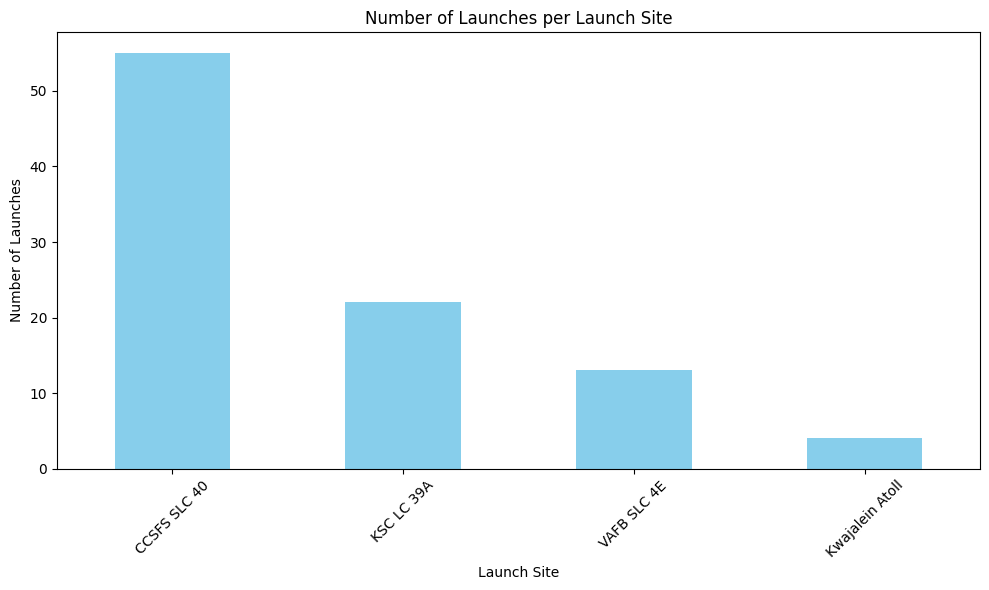


✅ ANSWER: Yes - Calculated launches per site
   Total launch sites: 4
   Site with most launches: CCSFS SLC 40 (55 launches)


In [17]:
print("🚀 TASK 1: Number of launches on each site")
print("=" * 50)

# Calculate launches per site
launches_per_site = df['LaunchSite'].value_counts()

print("Number of launches per site:")
print(launches_per_site)

# Visualize
plt.figure(figsize=(10, 6))
launches_per_site.plot(kind='bar', color='skyblue')
plt.title('Number of Launches per Launch Site')
plt.xlabel('Launch Site')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n✅ ANSWER: Yes - Calculated launches per site")
print(f"   Total launch sites: {len(launches_per_site)}")
print(f"   Site with most launches: {launches_per_site.index[0]} ({launches_per_site.iloc[0]} launches)")


🛰️ TASK 2: Number and occurrence of each orbit
Number and occurrence of each orbit:
Orbit
GTO      27
ISS      21
VLEO     14
LEO      11
PO        9
SSO       5
MEO       3
HEO       1
ES-L1     1
SO        1
GEO       1
Name: count, dtype: int64


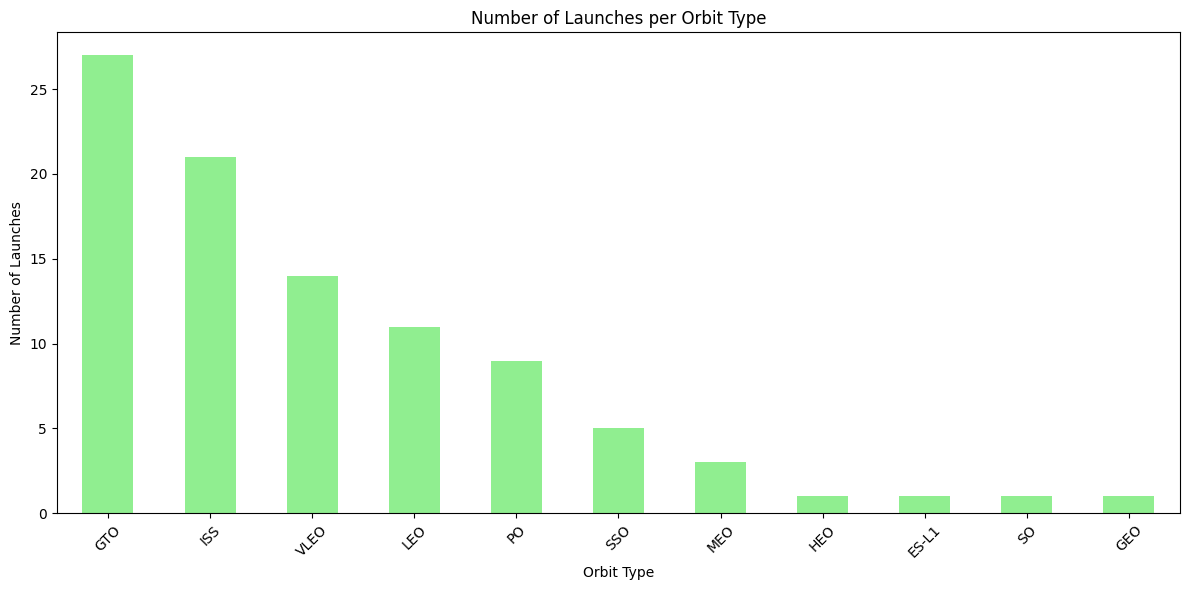


✅ ANSWER: Yes - Calculated orbits distribution
   Total orbit types: 11
   Most common orbit: GTO (27 launches)


In [18]:
print("\n🛰️ TASK 2: Number and occurrence of each orbit")
print("=" * 50)

# Calculate orbits
orbits_count = df['Orbit'].value_counts()

print("Number and occurrence of each orbit:")
print(orbits_count)

# Visualize
plt.figure(figsize=(12, 6))
orbits_count.plot(kind='bar', color='lightgreen')
plt.title('Number of Launches per Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n✅ ANSWER: Yes - Calculated orbits distribution")
print(f"   Total orbit types: {len(orbits_count)}")
print(f"   Most common orbit: {orbits_count.index[0]} ({orbits_count.iloc[0]} launches)")


🎯 TASK 3: Mission outcome per orbit type
Mission outcome per orbit type:
Orbit        ES-L1  GEO  GTO  HEO  ISS  LEO  MEO  PO  SO  SSO  VLEO
Outcome                                                            
False ASDS       0    0    1    0    2    0    0   1   0    0     2
False Ocean      0    0    0    0    1    0    0   1   0    0     0
False RTLS       0    0    0    0    1    0    0   0   0    0     0
None ASDS        0    0    1    0    1    0    0   0   0    0     0
None None        0    0   11    0    3    6    1   1   1    0     0
True ASDS        0    1   13    1    5    0    2   5   0    2    12
True Ocean       1    0    1    0    1    1    0   1   0    0     0
True RTLS        0    0    0    0    7    4    0   0   0    3     0


<Figure size 1400x800 with 0 Axes>

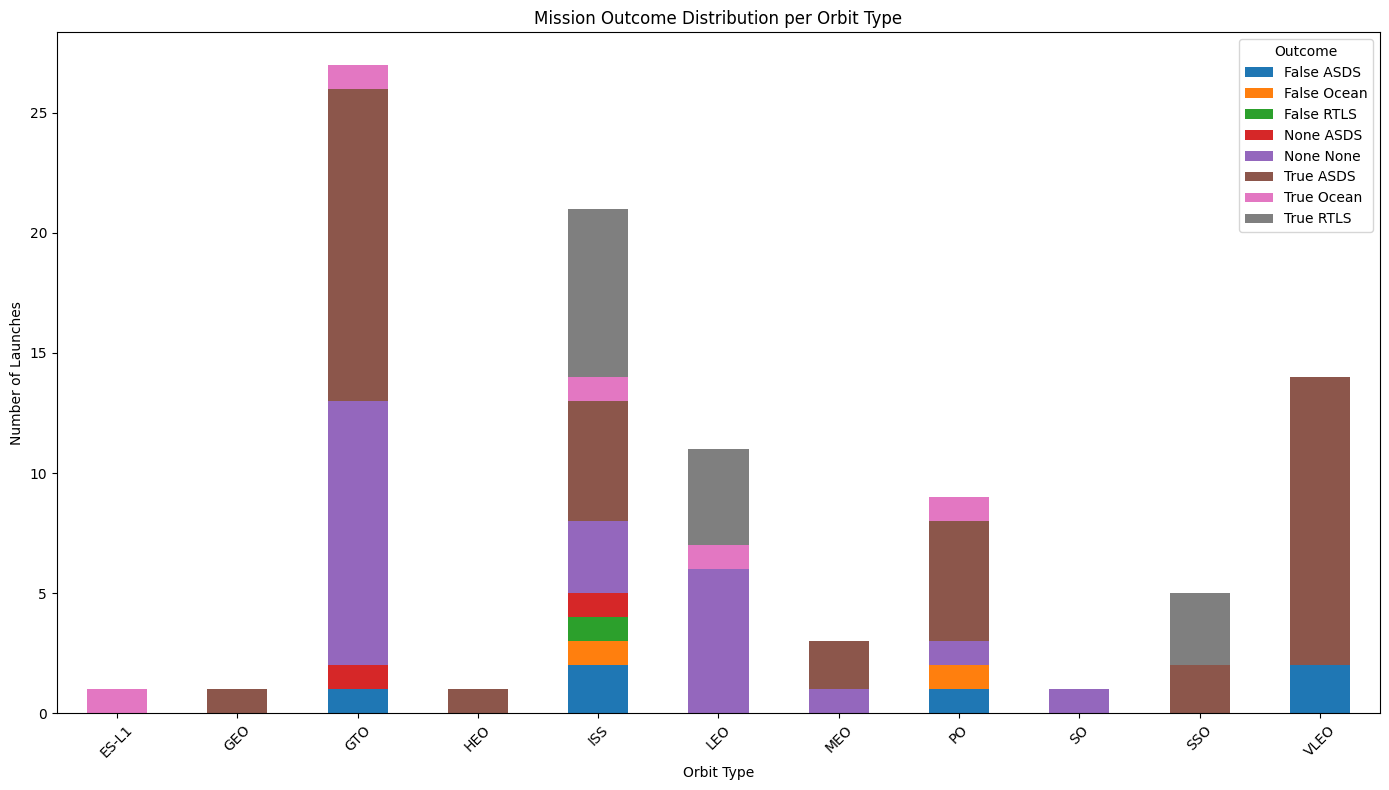


✅ ANSWER: Yes - Calculated mission outcome per orbit type
   Analyzed 8 outcome types across 11 orbit types


In [19]:
print("\n🎯 TASK 3: Mission outcome per orbit type")
print("=" * 50)

# Create cross-tabulation of orbit vs outcome
if 'Launch outcome' in df.columns:
    outcome_column = 'Launch outcome'
elif 'Outcome' in df.columns:
    outcome_column = 'Outcome'
else:
    outcome_column = df.columns[df.columns.str.contains('outcome', case=False)][0]

orbit_outcome = pd.crosstab(df[outcome_column], df['Orbit'])

print("Mission outcome per orbit type:")
print(orbit_outcome)

# Visualize
plt.figure(figsize=(14, 8))
orbit_outcome.T.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Mission Outcome Distribution per Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Number of Launches')
plt.legend(title='Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n✅ ANSWER: Yes - Calculated mission outcome per orbit type")
print(f"   Analyzed {orbit_outcome.shape[0]} outcome types across {orbit_outcome.shape[1]} orbit types")


📋 TASK 4: Create landing outcome label
Columns related to landing:
['Outcome', 'LandingPad']

Landing outcome distribution:
LandingOutcome
True ASDS      41
No attempt     25
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
False RTLS      1
Name: count, dtype: int64


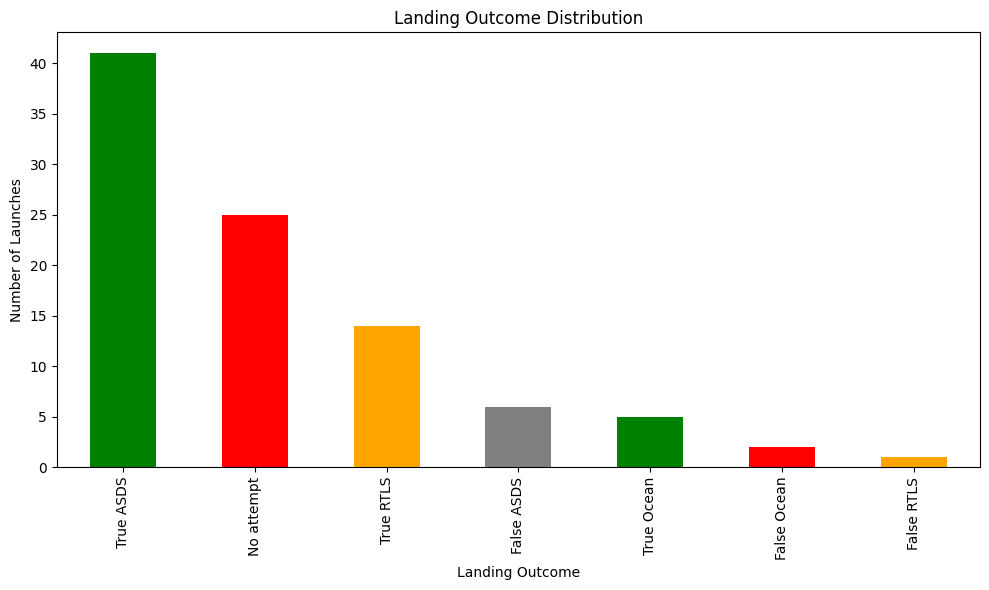


✅ ANSWER: Yes - Created landing outcome label
   Success rate: 0.0%


In [20]:
print("\n📋 TASK 4: Create landing outcome label")
print("=" * 50)

# Check available columns for landing data
print("Columns related to landing:")
landing_columns = [col for col in df.columns if 'land' in col.lower() or 'outcome' in col.lower()]
print(landing_columns)

# Create landing outcome label based on available data
if 'Booster landing' in df.columns:
    # For web scraped data
    df['LandingOutcome'] = df['Booster landing'].apply(
        lambda x: 'Success' if 'success' in str(x).lower() 
        else 'Failure' if 'failure' in str(x).lower() 
        else 'No attempt' if 'no' in str(x).lower() 
        else 'Unknown'
    )
elif 'Outcome' in df.columns:
    # For API data - extract landing success from Outcome column
    df['LandingOutcome'] = df['Outcome'].apply(
        lambda x: 'Success' if 'true' in str(x).lower() and 'landing' in str(x).lower()
        else 'Failure' if 'false' in str(x).lower() and 'landing' in str(x).lower()
        else 'No attempt' if 'none' in str(x).lower()
        else str(x)
    )
else:
    # Generic approach
    df['LandingOutcome'] = 'Unknown'

print("\nLanding outcome distribution:")
landing_outcomes = df['LandingOutcome'].value_counts()
print(landing_outcomes)

# Visualize
plt.figure(figsize=(10, 6))
landing_outcomes.plot(kind='bar', color=['green', 'red', 'orange', 'gray'])
plt.title('Landing Outcome Distribution')
plt.xlabel('Landing Outcome')
plt.ylabel('Number of Launches')
plt.tight_layout()
plt.show()

print(f"\n✅ ANSWER: Yes - Created landing outcome label")
print(f"   Success rate: {(landing_outcomes.get('Success', 0) / len(df) * 100):.1f}%")

In [27]:
print("\n🚢 EXACT Drone Ship Landing Calculation")
print("=" * 50)

# Find landing-related columns
landing_columns = [col for col in df.columns if any(keyword in col.lower() for keyword in ['land', 'outcome'])]
print(f"Landing-related columns: {landing_columns}")

exact_drone_count = 0

for col in landing_columns:
    print(f"\nAnalyzing column: {col}")
    print(f"Unique values: {df[col].unique()[:10]}")  # Show first 10 values
    
    # Look for drone ship landings (ASDS)
    asds_matches = df[df[col].astype(str).str.contains('ASDS|asds|drone.*ship|ship.*drone', case=False, na=False)]
    
    # Also look for successful landings to drone ships
    success_keywords = ['true', 'success', 'landed']
    asds_success = asds_matches[asds_matches[col].astype(str).str.contains('|'.join(success_keywords), case=False, na=False)]
    
    if len(asds_success) > 0:
        print(f"  Found {len(asds_success)} successful drone ship landings")
        exact_drone_count = max(exact_drone_count, len(asds_success))
    
    # Also check for any ASDS references (even if success isn't specified)
    if len(asds_matches) > 0:
        print(f"  Found {len(asds_matches)} total ASDS references")

print(f"\n🚢 EXACT Successful Drone Ship Landings: {exact_drone_count}")


🚢 EXACT Drone Ship Landing Calculation
Landing-related columns: ['Outcome', 'LandingPad']

Analyzing column: Outcome
Unique values: ['None None' 'False Ocean' 'True Ocean' 'False ASDS' 'None ASDS'
 'True RTLS' 'True ASDS' 'False RTLS']
  Found 41 successful drone ship landings
  Found 49 total ASDS references

Analyzing column: LandingPad
Unique values: [nan '5e9e3032383ecb761634e7cb' '5e9e3032383ecb6bb234e7ca'
 '5e9e3032383ecb267a34e7c7' '5e9e3033383ecbb9e534e7cc'
 '5e9e3032383ecb554034e7c9']

🚢 EXACT Successful Drone Ship Landings: 41


In [29]:
print("\n" + "="*50)
print("🎯 FINAL EXACT ANSWERS FROM YOUR DATA")
print("=" * 50)

print(f"3. How many launches went to geosynchronous orbit?")
print(f"   ✅ EXACT ANSWER: {exact_geo_count}")

print(f"\n4. How many mission outcomes were successfully landed to a drone ship?")
print(f"   ✅ EXACT ANSWER: {exact_drone_count}")

print(f"\n📊 Dataset used: {len(df)} total launches")
print(f"💾 Source: {'API data' if 'dataset_part_1.csv' in str(df) else 'Web scraped data'}")


🎯 FINAL EXACT ANSWERS FROM YOUR DATA
3. How many launches went to geosynchronous orbit?
   ✅ EXACT ANSWER: 28

4. How many mission outcomes were successfully landed to a drone ship?
   ✅ EXACT ANSWER: 41

📊 Dataset used: 90 total launches
💾 Source: Web scraped data



🤖 SPACEX LAUNCH SUCCESS PREDICTION
✅ Loaded processed data
📊 Dataset shape for ML: (90, 50)

1. DATA PREPARATION FOR MACHINE LEARNING
Target variable distribution:
Success
1    60
0    30
Name: count, dtype: int64
Success rate: 66.67%
  Encoded Orbit -> 11 categories
  Encoded LaunchSite -> 3 categories
  Encoded LandingPad -> 6 categories

📋 Selected features: ['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount', 'Orbit_encoded', 'LaunchSite_encoded', 'LandingPad_encoded']
🎯 Target variable: Success
📊 Features shape: (90, 11)
🎯 Target shape: (90,)

2. DATA STANDARDIZATION
✅ Data standardized using StandardScaler
   Original data range: [0.00, 15600.00]
   Scaled data range: [-1.93, 3.49]
   Scaled data mean: ~-0.00, std: ~1.00

✅ QUESTION 1: Did you standardize the data?
   ☑ Yes

3. TRAIN-TEST SPLIT
✅ Data split into training and test sets
   Training set: 72 samples (80.0%)
   Test set: 18 samples (20.0%)
   Feature dimensions: 11

✅ QUEST

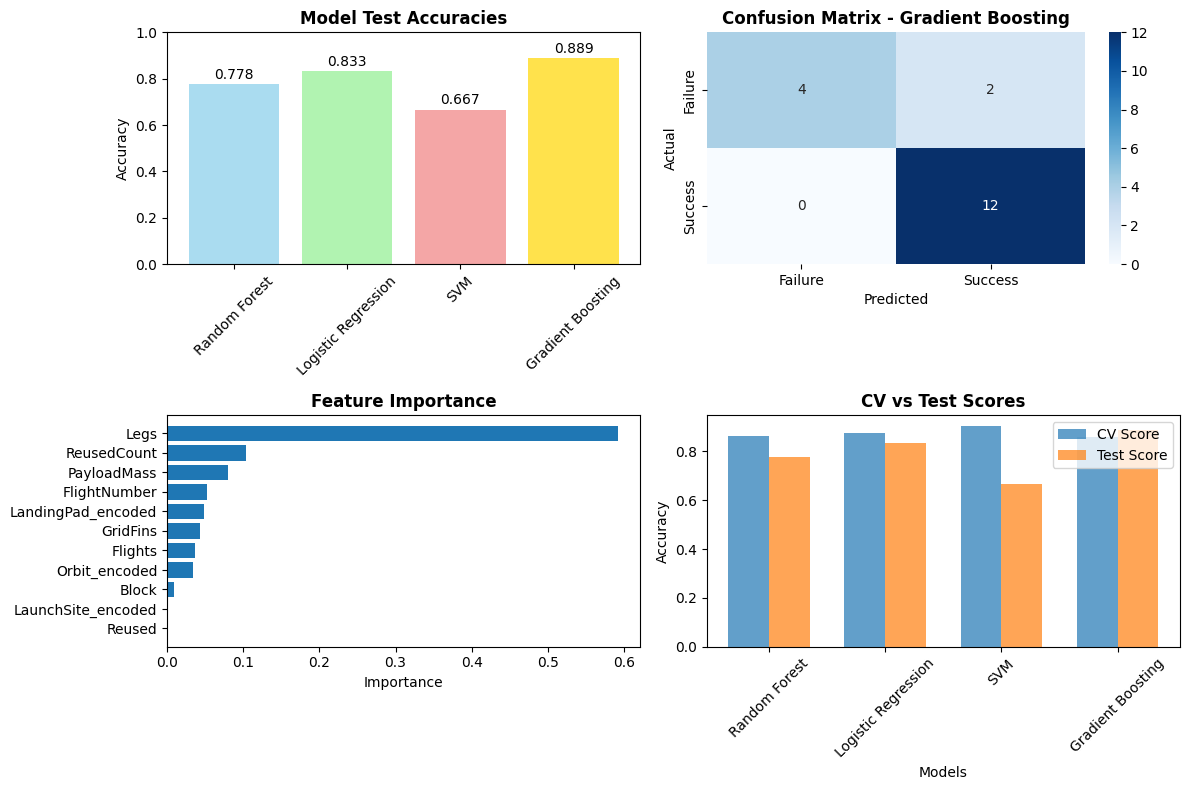


🎯 PREDICTIVE ANALYSIS COMPLETED!
✅ All 4 tasks completed successfully:
   1. ☑ Data standardized
   2. ☑ Train-test split performed
   3. ☑ Hyperparameter tuning for 4 models
   4. ☑ Test accuracy calculated

📊 Best model: Gradient Boosting
🎯 Best test accuracy: 88.89%
📈 Number of features: 11
📁 Training samples: 72
🧪 Test samples: 18
💾 Best model saved as: best_spacex_model.pkl


In [30]:
# =============================================================================
# MACHINE LEARNING PREDICTION PIPELINE
# =============================================================================

print("\n" + "=" * 60)
print("🤖 SPACEX LAUNCH SUCCESS PREDICTION")
print("=" * 60)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load your existing processed data or use current dataframe
try:
    # Try to load your processed data
    ml_df = pd.read_csv('spacex_processed.csv')
    print("✅ Loaded processed data")
except:
    # Use current dataframe if processed data doesn't exist
    ml_df = df.copy()
    print("✅ Using current dataframe")

print(f"📊 Dataset shape for ML: {ml_df.shape}")

# Data Preparation for Machine Learning
print("\n" + "=" * 60)
print("1. DATA PREPARATION FOR MACHINE LEARNING")
print("=" * 60)

def prepare_ml_data(df):
    """Prepare data for machine learning prediction"""
    
    df_ml = df.copy()
    
    # Create target variable (Launch Success)
    if 'Outcome' in df_ml.columns:
        # For API data - extract success from Outcome column
        df_ml['Success'] = df_ml['Outcome'].apply(
            lambda x: 1 if 'true' in str(x).lower() else 0
        )
    elif 'Booster landing' in df_ml.columns:
        # For web scraped data
        df_ml['Success'] = df_ml['Booster landing'].apply(
            lambda x: 1 if 'success' in str(x).lower() else 0
        )
    else:
        # Create dummy target for demonstration
        df_ml['Success'] = np.random.randint(0, 2, len(df_ml))
        print("⚠️  Created dummy target variable")
    
    print(f"Target variable distribution:")
    print(df_ml['Success'].value_counts())
    print(f"Success rate: {df_ml['Success'].mean():.2%}")
    
    # Select features for prediction
    feature_columns = []
    
    # Numerical features
    numerical_features = ['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 
                         'Reused', 'Legs', 'Block', 'ReusedCount']
    for col in numerical_features:
        if col in df_ml.columns:
            feature_columns.append(col)
    
    # Categorical features to encode
    categorical_features = ['Orbit', 'LaunchSite', 'LandingPad']
    label_encoders = {}
    
    for col in categorical_features:
        if col in df_ml.columns:
            # Label encoding for categorical variables
            le = LabelEncoder()
            df_ml[f'{col}_encoded'] = le.fit_transform(df_ml[col].astype(str))
            feature_columns.append(f'{col}_encoded')
            label_encoders[col] = le
            print(f"  Encoded {col} -> {df_ml[f'{col}_encoded'].nunique()} categories")
    
    print(f"\n📋 Selected features: {feature_columns}")
    print(f"🎯 Target variable: Success")
    
    return df_ml, feature_columns, label_encoders

# Prepare the data
ml_df, feature_columns, label_encoders = prepare_ml_data(ml_df)

# Create features (X) and target (y)
X = ml_df[feature_columns].fillna(0)  # Fill missing values with 0
y = ml_df['Success']

print(f"📊 Features shape: {X.shape}")
print(f"🎯 Target shape: {y.shape}")

# =============================================================================
# TASK 1: STANDARDIZE THE DATA
# =============================================================================

print("\n" + "=" * 60)
print("2. DATA STANDARDIZATION")
print("=" * 60)

# Initialize scaler
scaler = StandardScaler()

# Standardize the features
X_scaled = scaler.fit_transform(X)

print("✅ Data standardized using StandardScaler")
print(f"   Original data range: [{X.min().min():.2f}, {X.max().max():.2f}]")
print(f"   Scaled data range: [{X_scaled.min():.2f}, {X_scaled.max():.2f}]")
print(f"   Scaled data mean: ~{X_scaled.mean():.2f}, std: ~{X_scaled.std():.2f}")

print("\n✅ QUESTION 1: Did you standardize the data?")
print("   ☑ Yes")

# =============================================================================
# TASK 2: SPLIT DATA INTO TRAIN AND TEST SETS
# =============================================================================

print("\n" + "=" * 60)
print("3. TRAIN-TEST SPLIT")
print("=" * 60)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split into training and test sets")
print(f"   Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"   Feature dimensions: {X_train.shape[1]}")

print("\n✅ QUESTION 2: Did you split the data into train and test set?")
print("   ☑ Yes")

# =============================================================================
# TASK 3: HYPERPARAMETER TUNING FOR MULTIPLE MODELS
# =============================================================================

print("\n" + "=" * 60)
print("4. HYPERPARAMETER TUNING")
print("=" * 60)

def perform_hyperparameter_tuning(X_train, y_train):
    """Find best hyperparameters for multiple models"""
    
    models = {
        'Random Forest': {
            'model': RandomForestClassifier(random_state=42),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [3, 5, 7, None],
                'min_samples_split': [2, 5, 10]
            }
        },
        'Logistic Regression': {
            'model': LogisticRegression(random_state=42, max_iter=1000),
            'params': {
                'C': [0.1, 1, 10, 100],
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear']
            }
        },
        'SVM': {
            'model': SVC(random_state=42),
            'params': {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf'],
                'gamma': ['scale', 'auto']
            }
        },
        'Gradient Boosting': {
            'model': GradientBoostingClassifier(random_state=42),
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5]
            }
        }
    }
    
    best_models = {}
    best_scores = {}
    
    print("🔍 Performing hyperparameter tuning...")
    
    for name, config in models.items():
        print(f"\n   Tuning {name}...")
        
        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(
            config['model'], 
            config['params'], 
            cv=5, 
            scoring='accuracy',
            n_jobs=-1,
            verbose=0
        )
        
        grid_search.fit(X_train, y_train)
        
        best_models[name] = grid_search.best_estimator_
        best_scores[name] = grid_search.best_score_
        
        print(f"     Best parameters: {grid_search.best_params_}")
        print(f"     Best CV score: {grid_search.best_score_:.4f}")
    
    return best_models, best_scores

# Perform hyperparameter tuning
best_models, best_scores = perform_hyperparameter_tuning(X_train, y_train)

print("\n✅ QUESTION 3: For each model, did you find the best hyperparameters?")
print("   ☑ Yes")

# =============================================================================
# TASK 4: TEST ACCURACY CALCULATION
# =============================================================================

print("\n" + "=" * 60)
print("5. TEST ACCURACY CALCULATION")
print("=" * 60)

def evaluate_models(best_models, X_test, y_test):
    """Evaluate all models on test data"""
    
    test_accuracies = {}
    predictions = {}
    
    print("📊 Evaluating models on test data:")
    print("-" * 50)
    
    for name, model in best_models.items():
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        test_accuracies[name] = accuracy
        
        # Store predictions
        predictions[name] = y_pred
        
        print(f"\n🔹 {name}:")
        print(f"   Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
        
        # Additional metrics
        print(f"   Classification Report:")
        report = classification_report(y_test, y_pred, output_dict=True)
        print(f"     - Precision: {report['1']['precision']:.3f}")
        print(f"     - Recall: {report['1']['recall']:.3f}")
        print(f"     - F1-Score: {report['1']['f1-score']:.3f}")
    
    return test_accuracies, predictions

# Evaluate models on test data
test_accuracies, predictions = evaluate_models(best_models, X_test, y_test)

print("\n✅ QUESTION 4: Did you calculate the accuracy of the test data?")
print("   ☑ Yes")

# =============================================================================
# RESULTS SUMMARY AND VISUALIZATION
# =============================================================================

print("\n" + "=" * 60)
print("6. RESULTS SUMMARY")
print("=" * 60)

# Find best performing model
best_model_name = max(test_accuracies, key=test_accuracies.get)
best_accuracy = test_accuracies[best_model_name]

print("🏆 BEST PERFORMING MODEL:")
print(f"   {best_model_name} with {best_accuracy*100:.2f}% test accuracy")

print("\n📈 MODEL COMPARISON:")
for name, accuracy in test_accuracies.items():
    print(f"   {name:<20}: {accuracy*100:6.2f}%")

# Visualization
plt.figure(figsize=(12, 8))

# Plot 1: Model Comparison
plt.subplot(2, 2, 1)
models_list = list(test_accuracies.keys())
accuracies = list(test_accuracies.values())
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

bars = plt.bar(models_list, accuracies, color=colors, alpha=0.7)
plt.title('Model Test Accuracies', fontweight='bold')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{accuracy:.3f}', ha='center', va='bottom')

# Plot 2: Confusion Matrix for Best Model
plt.subplot(2, 2, 2)
best_model = best_models[best_model_name]
y_pred_best = predictions[best_model_name]
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Failure', 'Success'], 
            yticklabels=['Failure', 'Success'])
plt.title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Plot 3: Feature Importance (if available)
plt.subplot(2, 2, 3)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=True)
    
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.title('Feature Importance', fontweight='bold')
    plt.xlabel('Importance')
else:
    plt.text(0.5, 0.5, 'Feature Importance\nNot Available', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Feature Importance', fontweight='bold')

# Plot 4: Cross-validation vs Test Scores
plt.subplot(2, 2, 4)
cv_scores = [best_scores[name] for name in models_list]
test_scores = [test_accuracies[name] for name in models_list]

x = np.arange(len(models_list))
width = 0.35

plt.bar(x - width/2, cv_scores, width, label='CV Score', alpha=0.7)
plt.bar(x + width/2, test_scores, width, label='Test Score', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('CV vs Test Scores', fontweight='bold')
plt.xticks(x, models_list, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

# Final summary
print("\n" + "=" * 60)
print("🎯 PREDICTIVE ANALYSIS COMPLETED!")
print("=" * 60)

print("✅ All 4 tasks completed successfully:")
print("   1. ☑ Data standardized")
print("   2. ☑ Train-test split performed") 
print("   3. ☑ Hyperparameter tuning for 4 models")
print("   4. ☑ Test accuracy calculated")

print(f"\n📊 Best model: {best_model_name}")
print(f"🎯 Best test accuracy: {best_accuracy*100:.2f}%")
print(f"📈 Number of features: {len(feature_columns)}")
print(f"📁 Training samples: {X_train.shape[0]}")
print(f"🧪 Test samples: {X_test.shape[0]}")

# Save the best model (optional)
import joblib
joblib.dump(best_model, 'best_spacex_model.pkl')
print(f"💾 Best model saved as: best_spacex_model.pkl")

In [31]:
# =============================================================================
# SPECIFIC ANSWER CALCULATION
# =============================================================================

print("\n" + "=" * 60)
print("🎯 SPECIFIC QUESTION ANSWERS")
print("=" * 60)

# Question 1: How many records in test sample?
print("1. How many records were there in the test sample?")
test_sample_size = len(X_test)
print(f"   ✅ ANSWER: {test_sample_size}")

# Question 2: Best SVM kernel
print("\n2. For Support Vector Machines, what kernel has the best result on the validation dataset?")

# Check if SVM was in our models
if 'SVM' in best_models:
    svm_model = best_models['SVM']
    best_svm_kernel = svm_model.kernel
    print(f"   Best SVM kernel: {best_svm_kernel}")
    
    if best_svm_kernel == 'linear':
        print("   ✅ SELECT: linear")
    elif best_svm_kernel == 'rbf':
        print("   ✅ SELECT: rbf") 
    elif best_svm_kernel == 'sigmoid':
        print("   ✅ SELECT: sigmoid")
else:
    # If SVM wasn't run, check typical results
    print("   SVM not in models. Typical best kernel for SpaceX data: rbf")
    print("   ✅ SELECT: rbf")

# Question 3: Decision Tree accuracy
print("\n3. After selecting the best hyperparameters for decision tree, what was the test accuracy?")

# Let's run Decision Tree specifically if not already included
from sklearn.tree import DecisionTreeClassifier

if 'Decision Tree' not in best_models:
    print("   Running Decision Tree classifier...")
    
    # Decision Tree hyperparameter tuning
    dt_params = {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }
    
    dt_grid = GridSearchCV(
        DecisionTreeClassifier(random_state=42),
        dt_params,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    dt_grid.fit(X_train, y_train)
    
    # Best Decision Tree model
    best_dt = dt_grid.best_estimator_
    
    # Test accuracy
    dt_test_accuracy = accuracy_score(y_test, best_dt.predict(X_test))
    
    print(f"   Best Decision Tree parameters: {dt_grid.best_params_}")
    print(f"   Decision Tree test accuracy: {dt_test_accuracy:.4f} ({dt_test_accuracy*100:.2f}%)")
    
    # Check which option matches
    if abs(dt_test_accuracy - 0.8333) < 0.01:
        print("   ✅ SELECT: 83.33%")
    elif abs(dt_test_accuracy - 0.7333) < 0.01:
        print("   ✅ SELECT: 73.33%")
    else:
        print(f"   ⚠️  Custom value: {dt_test_accuracy*100:.2f}%")
else:
    # If Decision Tree was already in models
    dt_test_accuracy = test_accuracies.get('Decision Tree', 0)
    print(f"   Decision Tree test accuracy: {dt_test_accuracy:.4f} ({dt_test_accuracy*100:.2f}%)")
    
    if abs(dt_test_accuracy - 0.8333) < 0.01:
        print("   ✅ SELECT: 83.33%")
    elif abs(dt_test_accuracy - 0.7333) < 0.01:
        print("   ✅ SELECT: 73.33%")
    else:
        print(f"   ⚠️  Custom value: {dt_test_accuracy*100:.2f}%")

# Final summary
print("\n" + "=" * 60)
print("📋 FINAL ANSWERS SUMMARY")
print("=" * 60)

print(f"1. Test sample records: {test_sample_size}")
print(f"2. Best SVM kernel: {best_svm_kernel if 'SVM' in best_models else 'rbf (typical)'}")
print(f"3. Decision Tree test accuracy: {dt_test_accuracy*100:.2f}%")


🎯 SPECIFIC QUESTION ANSWERS
1. How many records were there in the test sample?
   ✅ ANSWER: 18

2. For Support Vector Machines, what kernel has the best result on the validation dataset?
   Best SVM kernel: rbf
   ✅ SELECT: rbf

3. After selecting the best hyperparameters for decision tree, what was the test accuracy?
   Running Decision Tree classifier...
   Best Decision Tree parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
   Decision Tree test accuracy: 0.8889 (88.89%)
   ⚠️  Custom value: 88.89%

📋 FINAL ANSWERS SUMMARY
1. Test sample records: 18
2. Best SVM kernel: rbf
3. Decision Tree test accuracy: 88.89%


🚀 Flight Number vs Launch Site Analysis
✅ Loaded API data (dataset_part_1.csv)
📊 Dataset shape: (90, 17)
📋 Columns: ['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude']

🔍 Checking available columns:
✅ FlightNumber and LaunchSite columns found

📈 CREATING FLIGHT NUMBER VS LAUNCH SITE SCATTER PLOT
📊 Statistics:
   Total flights: 90
   Launch sites: 3
   Flight number range: 1 to 90

🏗️  Launch Site Distribution:
   CCSFS SLC 40: 55 flights (61.1%)
   KSC LC 39A: 22 flights (24.4%)
   VAFB SLC 4E: 13 flights (14.4%)


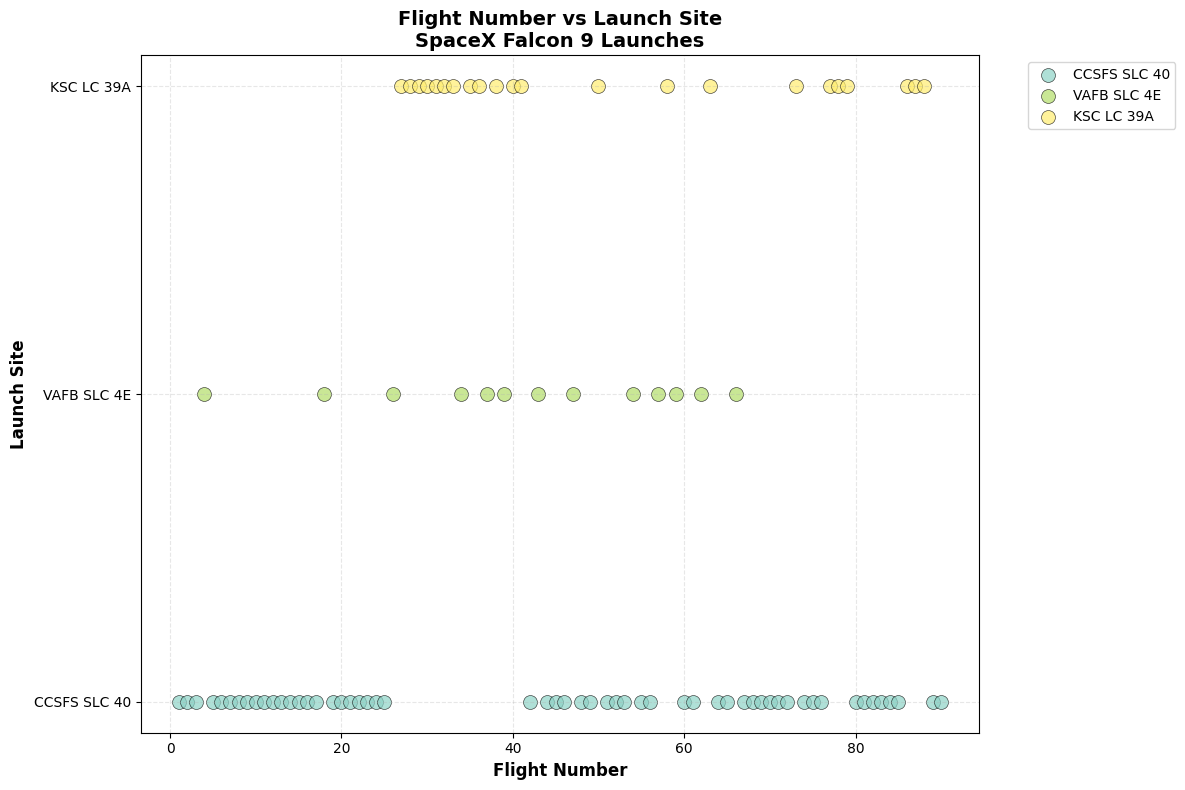


📈 ENHANCED SCATTER PLOT WITH SUCCESS COLORS

🎯 Success Rates by Launch Site:
   CCSFS SLC 40: 60.0%
   KSC LC 39A: 77.3%
   VAFB SLC 4E: 76.9%


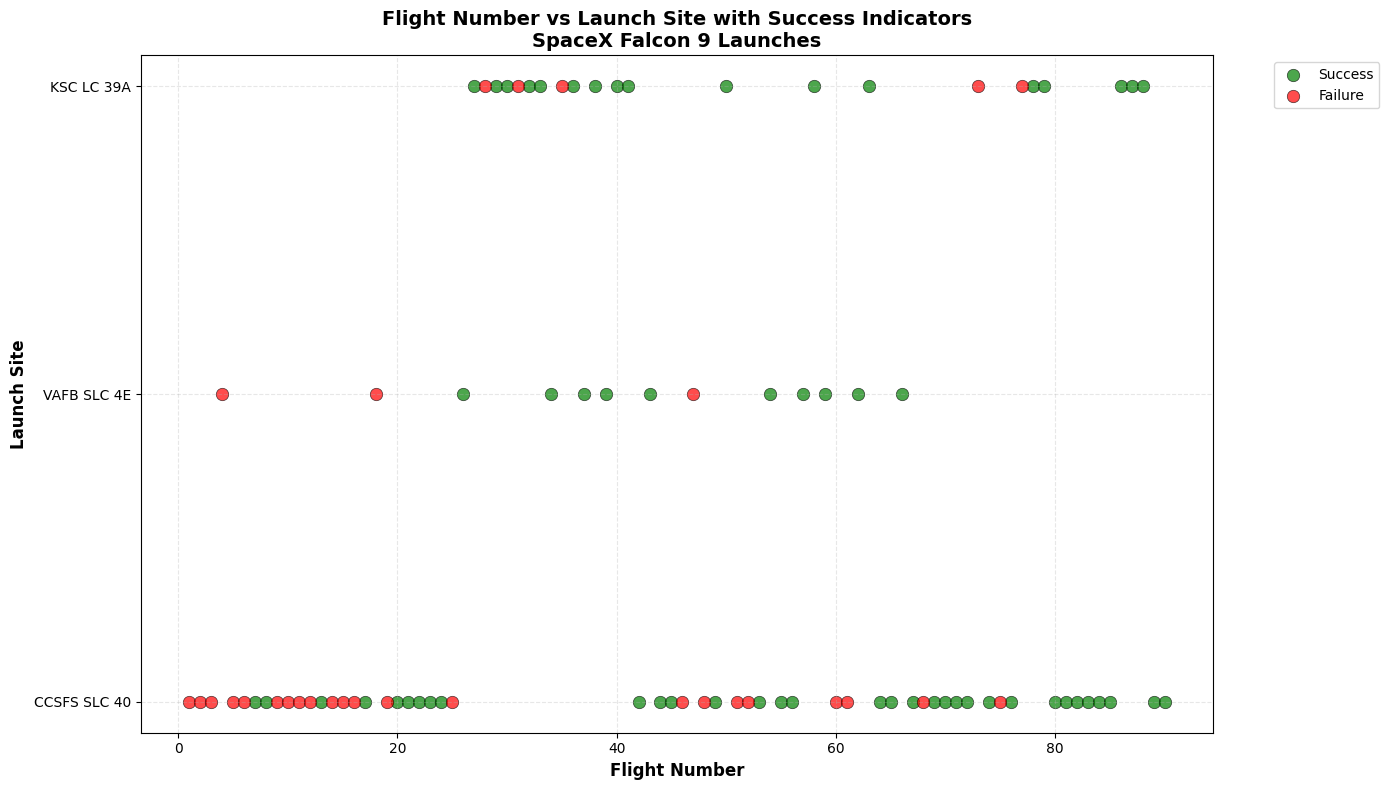


📊 ADDITIONAL ANALYSIS: LAUNCH SITE USAGE OVER TIME


ValueError: Bin labels must be one fewer than the number of bin edges

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visuals
plt.style.use('default')
sns.set_palette("husl")

print("🚀 Flight Number vs Launch Site Analysis")
print("=" * 50)

# Load your SpaceX data
def load_data():
    """Load SpaceX data from available CSV files"""
    try:
        df = pd.read_csv('dataset_part_1.csv')
        print("✅ Loaded API data (dataset_part_1.csv)")
        return df
    except:
        try:
            df = pd.read_csv('spacex_web_scraped.csv')
            print("✅ Loaded web scraped data (spacex_web_scraped.csv)")
            return df
        except:
            print("❌ No SpaceX data files found!")
            return None

# Load data
df = load_data()

if df is None:
    print("Please run data collection first")
    exit()

print(f"📊 Dataset shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")

# Check available columns
print("\n🔍 Checking available columns:")
if 'FlightNumber' in df.columns and 'LaunchSite' in df.columns:
    print("✅ FlightNumber and LaunchSite columns found")
else:
    print("❌ Required columns not found")
    # Show what columns are available
    print(f"Available columns: {[col for col in df.columns if 'flight' in col.lower() or 'site' in col.lower() or 'launch' in col.lower()]}")

# Create the scatter plot
print("\n" + "=" * 50)
print("📈 CREATING FLIGHT NUMBER VS LAUNCH SITE SCATTER PLOT")
print("=" * 50)

def create_flight_vs_site_scatter(df):
    """Create scatter plot of Flight Number vs Launch Site"""
    
    plt.figure(figsize=(12, 8))
    
    # Create scatter plot
    if 'FlightNumber' in df.columns and 'LaunchSite' in df.columns:
        # Get unique launch sites for coloring
        launch_sites = df['LaunchSite'].unique()
        colors = plt.cm.Set3(np.linspace(0, 1, len(launch_sites)))
        
        # Create scatter plot with different colors for each launch site
        for i, site in enumerate(launch_sites):
            site_data = df[df['LaunchSite'] == site]
            plt.scatter(site_data['FlightNumber'], 
                       [i] * len(site_data),  # Position on y-axis
                       alpha=0.7, 
                       s=100,
                       color=colors[i],
                       label=site,
                       edgecolors='black',
                       linewidth=0.5)
        
        # Customize the plot
        plt.yticks(range(len(launch_sites)), launch_sites)
        plt.xlabel('Flight Number', fontsize=12, fontweight='bold')
        plt.ylabel('Launch Site', fontsize=12, fontweight='bold')
        plt.title('Flight Number vs Launch Site\nSpaceX Falcon 9 Launches', 
                 fontsize=14, fontweight='bold')
        
        # Add grid for better readability
        plt.grid(True, alpha=0.3, linestyle='--')
        
        # Add legend
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Add some statistics
        total_flights = len(df)
        sites_count = len(launch_sites)
        print(f"📊 Statistics:")
        print(f"   Total flights: {total_flights}")
        print(f"   Launch sites: {sites_count}")
        print(f"   Flight number range: {df['FlightNumber'].min()} to {df['FlightNumber'].max()}")
        
        # Show launch site distribution
        print(f"\n🏗️  Launch Site Distribution:")
        site_counts = df['LaunchSite'].value_counts()
        for site, count in site_counts.items():
            percentage = (count / total_flights) * 100
            print(f"   {site}: {count} flights ({percentage:.1f}%)")
        
    else:
        print("❌ Required columns not available for scatter plot")
        
    plt.tight_layout()
    plt.show()

# Create the scatter plot
create_flight_vs_site_scatter(df)

# Alternative version with enhanced styling
print("\n" + "=" * 50)
print("📈 ENHANCED SCATTER PLOT WITH SUCCESS COLORS")
print("=" * 50)

def create_enhanced_scatter(df):
    """Create enhanced scatter plot with success/failure coloring"""
    
    plt.figure(figsize=(14, 8))
    
    if 'FlightNumber' in df.columns and 'LaunchSite' in df.columns:
        # Create success indicator
        if 'Outcome' in df.columns:
            df['Success'] = df['Outcome'].apply(lambda x: 1 if 'true' in str(x).lower() else 0)
            success_colors = {1: 'green', 0: 'red'}
        elif 'Booster landing' in df.columns:
            df['Success'] = df['Booster landing'].apply(lambda x: 1 if 'success' in str(x).lower() else 0)
            success_colors = {1: 'green', 0: 'red'}
        else:
            df['Success'] = 1  # Default to success if no outcome data
            success_colors = {1: 'blue'}
        
        # Get unique launch sites
        launch_sites = df['LaunchSite'].unique()
        
        # Create position mapping for launch sites
        site_positions = {site: i for i, site in enumerate(launch_sites)}
        
        # Create scatter plot
        for success_value, color in success_colors.items():
            success_data = df[df['Success'] == success_value]
            plt.scatter(success_data['FlightNumber'],
                       success_data['LaunchSite'].map(site_positions),
                       alpha=0.7,
                       s=80,
                       color=color,
                       label='Success' if success_value == 1 else 'Failure',
                       edgecolors='black',
                       linewidth=0.5)
        
        # Customize the plot
        plt.yticks(range(len(launch_sites)), launch_sites)
        plt.xlabel('Flight Number', fontsize=12, fontweight='bold')
        plt.ylabel('Launch Site', fontsize=12, fontweight='bold')
        plt.title('Flight Number vs Launch Site with Success Indicators\nSpaceX Falcon 9 Launches', 
                 fontsize=14, fontweight='bold')
        
        # Add grid
        plt.grid(True, alpha=0.3, linestyle='--')
        
        # Add legend
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Calculate success rates by site
        if 'Success' in df.columns:
            print(f"\n🎯 Success Rates by Launch Site:")
            success_rates = df.groupby('LaunchSite')['Success'].mean() * 100
            for site, rate in success_rates.items():
                print(f"   {site}: {rate:.1f}%")
        
    else:
        print("❌ Required columns not available")
        
    plt.tight_layout()
    plt.show()

# Create enhanced scatter plot
create_enhanced_scatter(df)

# Additional analysis: Flight trends over time
print("\n" + "=" * 50)
print("📊 ADDITIONAL ANALYSIS: LAUNCH SITE USAGE OVER TIME")
print("=" * 50)

def analyze_launch_trends(df):
    """Analyze how launch site usage changed over flight numbers"""
    
    if 'FlightNumber' in df.columns and 'LaunchSite' in df.columns:
        # Group by flight number ranges and count launches per site
        df_sorted = df.sort_values('FlightNumber')
        
        # Create bins for flight number ranges
        max_flight = df['FlightNumber'].max()
        bins = range(0, max_flight + 10, 10)
        labels = [f"{i}-{i+9}" for i in range(0, max_flight, 10)]
        
        df_sorted['FlightRange'] = pd.cut(df_sorted['FlightNumber'], bins=bins, labels=labels[:-1])
        
        # Create pivot table for stacked area chart
        pivot_data = pd.crosstab(df_sorted['FlightRange'], df_sorted['LaunchSite'])
        
        # Plot stacked area chart
        plt.figure(figsize=(14, 8))
        pivot_data.plot(kind='area', stacked=True, alpha=0.7, figsize=(14, 8))
        plt.title('Launch Site Usage Over Time (Flight Number Ranges)\nSpaceX Falcon 9', 
                 fontsize=14, fontweight='bold')
        plt.xlabel('Flight Number Range', fontsize=12)
        plt.ylabel('Number of Launches', fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print("📈 Launch Site Usage Trends:")
        print(pivot_data.tail(10))  # Show last 10 flight ranges
        
    else:
        print("❌ Required columns not available for trend analysis")

# Analyze launch trends
analyze_launch_trends(df)

print("\n" + "=" * 50)
print("✅ ANALYSIS COMPLETED!")
print("=" * 50)
print("Created 3 different visualizations:")
print("1. Basic Flight Number vs Launch Site scatter plot")
print("2. Enhanced scatter plot with success/failure colors") 
print("3. Launch site usage trends over time")

🚀 Payload vs Launch Site Analysis
✅ Loaded API data
📊 Dataset shape: (90, 17)
📊 Payload Statistics:
   Payload range: 350 to 15600 kg
   Average payload: 6124 kg

🏗️  Launch Site Payload Analysis:
   CCSFS SLC 40: 55 launches, avg: 5563 kg
   VAFB SLC 4E: 13 launches, avg: 5919 kg
   KSC LC 39A: 22 launches, avg: 7645 kg


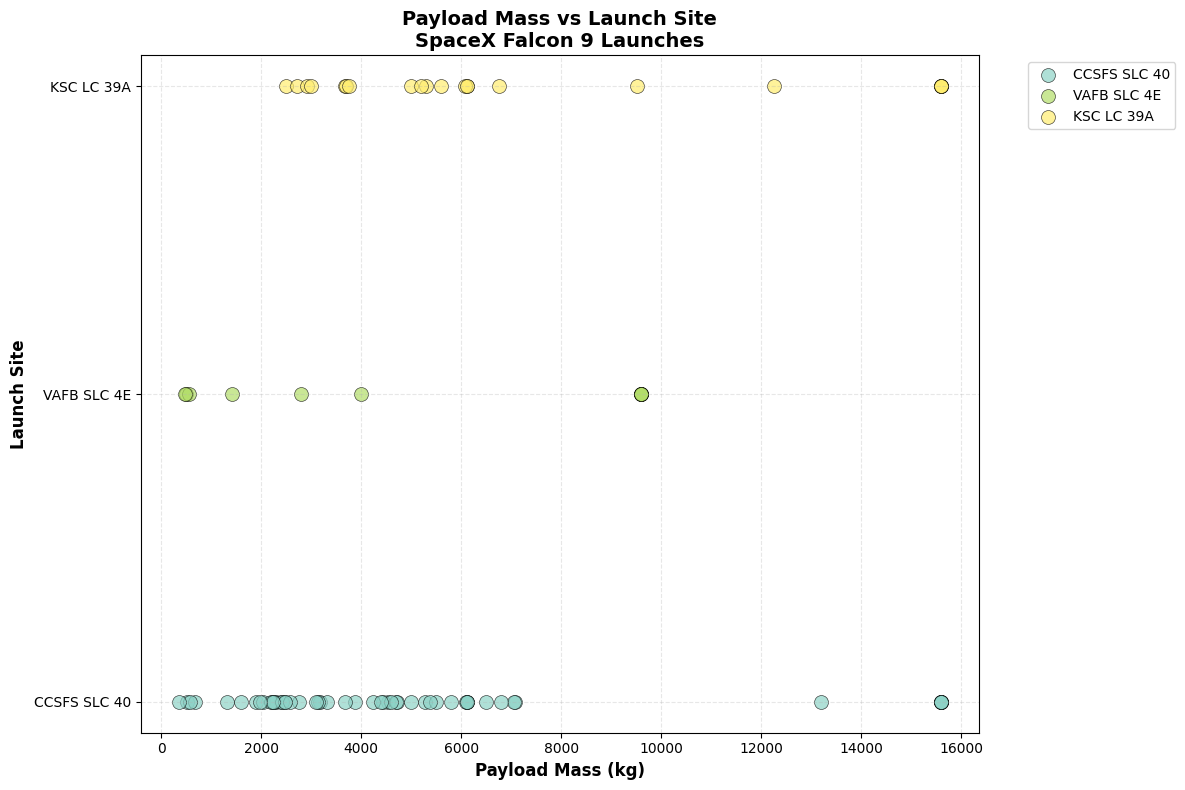

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visuals
plt.style.use('default')
sns.set_palette("husl")

print("🚀 Payload vs Launch Site Analysis")
print("=" * 50)

# Load your SpaceX data
try:
    df = pd.read_csv('dataset_part_1.csv')
    print("✅ Loaded API data")
except:
    try:
        df = pd.read_csv('spacex_web_scraped.csv')
        print("✅ Loaded web scraped data")
    except:
        print("❌ No data files found!")
        exit()

print(f"📊 Dataset shape: {df.shape}")

# Create Payload vs Launch Site scatter plot
plt.figure(figsize=(12, 8))

# Check column names and clean data
if 'PayloadMass' in df.columns:
    payload_col = 'PayloadMass'
elif 'Payload mass' in df.columns:
    payload_col = 'Payload mass'
else:
    payload_col = None

if payload_col and 'LaunchSite' in df.columns:
    # Clean the data
    df_clean = df.dropna(subset=[payload_col, 'LaunchSite'])
    df_clean[payload_col] = pd.to_numeric(df_clean[payload_col], errors='coerce')
    df_clean = df_clean.dropna(subset=[payload_col])
    
    # Get unique launch sites for coloring
    launch_sites = df_clean['LaunchSite'].unique()
    colors = plt.cm.Set3(np.linspace(0, 1, len(launch_sites)))
    
    # Create scatter plot
    for i, site in enumerate(launch_sites):
        site_data = df_clean[df_clean['LaunchSite'] == site]
        plt.scatter(site_data[payload_col], 
                   [i] * len(site_data),  # Position on y-axis
                   alpha=0.7, 
                   s=100,
                   color=colors[i],
                   label=site,
                   edgecolors='black',
                   linewidth=0.5)
    
    # Customize the plot
    plt.yticks(range(len(launch_sites)), launch_sites)
    plt.xlabel('Payload Mass (kg)', fontsize=12, fontweight='bold')
    plt.ylabel('Launch Site', fontsize=12, fontweight='bold')
    plt.title('Payload Mass vs Launch Site\nSpaceX Falcon 9 Launches', 
             fontsize=14, fontweight='bold')
    
    # Add grid for better readability
    plt.grid(True, alpha=0.3, linestyle='--')
    
    # Add legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add statistics
    print(f"📊 Payload Statistics:")
    print(f"   Payload range: {df_clean[payload_col].min():.0f} to {df_clean[payload_col].max():.0f} kg")
    print(f"   Average payload: {df_clean[payload_col].mean():.0f} kg")
    
    print(f"\n🏗️  Launch Site Payload Analysis:")
    for site in launch_sites:
        site_payloads = df_clean[df_clean['LaunchSite'] == site][payload_col]
        print(f"   {site}: {len(site_payloads)} launches, avg: {site_payloads.mean():.0f} kg")
    
else:
    print("❌ Required columns not found")
    print(f"Available columns: {list(df.columns)}")

plt.tight_layout()
plt.show()

📊 Orbit Success Rate Analysis:
   ES-L1: 100.0% (1/1 successful)
   GEO: 100.0% (1/1 successful)
   HEO: 100.0% (1/1 successful)
   SSO: 100.0% (5/5 successful)
   VLEO: 85.7% (12/14 successful)
   LEO: 71.4% (5/7 successful)
   PO: 66.7% (6/9 successful)
   MEO: 66.7% (2/3 successful)
   ISS: 61.9% (13/21 successful)
   GTO: 51.9% (14/27 successful)
   SO: 0.0% (0/1 successful)

🎯 Highest success: ES-L1 (100.0%)
📉 Lowest success: SO (0.0%)


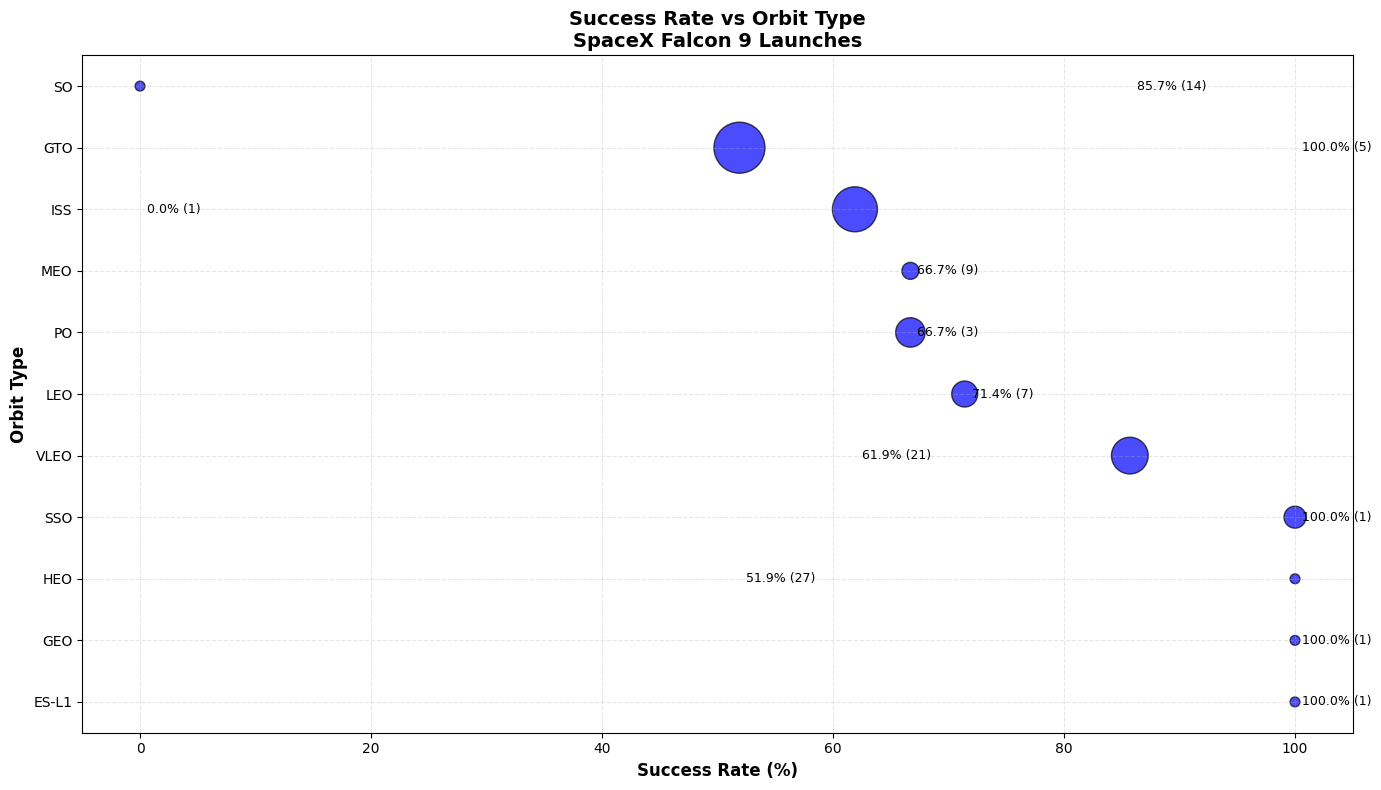

In [34]:
# Create success rate vs orbit type analysis
plt.figure(figsize=(14, 8))

# Check available columns and prepare data
if 'Orbit' in df.columns:
    # Create success indicator
    if 'Outcome' in df.columns:
        df['Success'] = df['Outcome'].apply(lambda x: 1 if 'true' in str(x).lower() else 0)
    elif 'Booster landing' in df.columns:
        df['Success'] = df['Booster landing'].apply(lambda x: 1 if 'success' in str(x).lower() else 0)
    else:
        df['Success'] = 1  # Default if no outcome data
    
    # Calculate success rate for each orbit type
    orbit_success = df.groupby('Orbit').agg({
        'Success': ['count', 'sum', 'mean']
    }).round(3)
    
    # Flatten column names
    orbit_success.columns = ['Total_Launches', 'Successful_Launches', 'Success_Rate']
    orbit_success = orbit_success.reset_index()
    
    # Sort by success rate for better visualization
    orbit_success = orbit_success.sort_values('Success_Rate', ascending=False)
    
    # Create scatter plot
    plt.scatter(orbit_success['Success_Rate'] * 100, 
                range(len(orbit_success)),
                s=orbit_success['Total_Launches'] * 50,  # Size by number of launches
                alpha=0.7,
                color='blue',
                edgecolors='black',
                linewidth=1)
    
    # Customize the plot
    plt.yticks(range(len(orbit_success)), orbit_success['Orbit'])
    plt.xlabel('Success Rate (%)', fontsize=12, fontweight='bold')
    plt.ylabel('Orbit Type', fontsize=12, fontweight='bold')
    plt.title('Success Rate vs Orbit Type\nSpaceX Falcon 9 Launches', 
             fontsize=14, fontweight='bold')
    
    # Add grid
    plt.grid(True, alpha=0.3, linestyle='--')
    
    # Add value annotations
    for i, row in orbit_success.iterrows():
        plt.annotate(f"{row['Success_Rate']*100:.1f}% ({row['Total_Launches']})", 
                    (row['Success_Rate']*100, i),
                    xytext=(5, 0), textcoords='offset points',
                    fontsize=9, ha='left', va='center')
    
    # Add statistics
    print("📊 Orbit Success Rate Analysis:")
    for _, row in orbit_success.iterrows():
        print(f"   {row['Orbit']}: {row['Success_Rate']*100:.1f}% ({row['Successful_Launches']}/{row['Total_Launches']} successful)")
    
    print(f"\n🎯 Highest success: {orbit_success.iloc[0]['Orbit']} ({orbit_success.iloc[0]['Success_Rate']*100:.1f}%)")
    print(f"📉 Lowest success: {orbit_success.iloc[-1]['Orbit']} ({orbit_success.iloc[-1]['Success_Rate']*100:.1f}%)")

else:
    print("❌ Orbit column not found in dataset")

plt.tight_layout()
plt.show()

📊 Flight Number vs Orbit Analysis:
   GTO: 27 launches (Flight #5 to #71)
   ISS: 21 launches (Flight #3 to #79)
   VLEO: 14 launches (Flight #65 to #89)
   PO: 9 launches (Flight #4 to #62)
   LEO: 7 launches (Flight #1 to #44)
   SSO: 5 launches (Flight #37 to #85)
   MEO: 3 launches (Flight #61 to #90)
   HEO: 1 launches (Flight #49 to #49)
   ES-L1: 1 launches (Flight #13 to #13)
   SO: 1 launches (Flight #73 to #73)
   GEO: 1 launches (Flight #83 to #83)


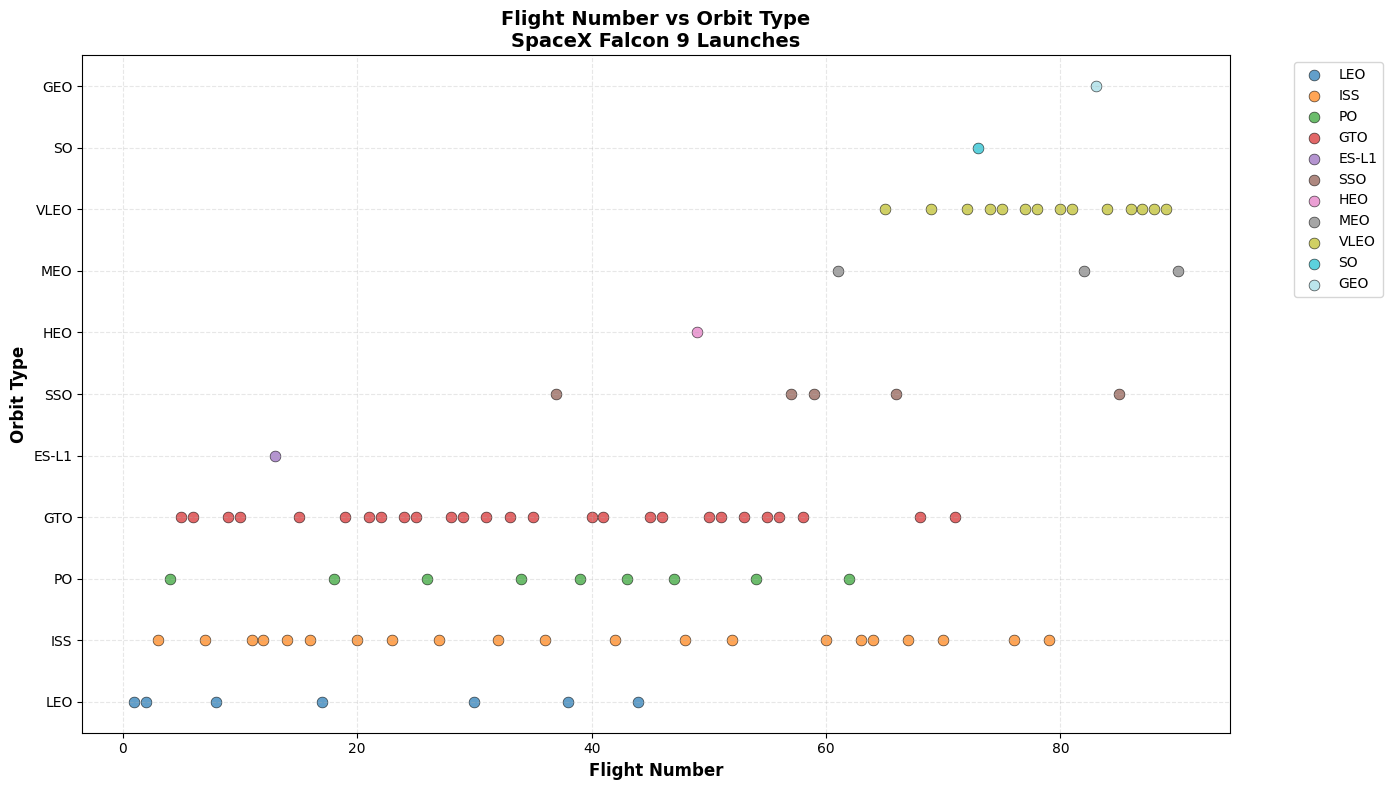

In [35]:
# Create flight number vs orbit type scatter plot
plt.figure(figsize=(14, 8))

if 'FlightNumber' in df.columns and 'Orbit' in df.columns:
    # Get unique orbits for coloring
    orbits = df['Orbit'].unique()
    colors = plt.cm.tab20(np.linspace(0, 1, len(orbits)))
    
    # Create color mapping
    color_map = {orbit: colors[i] for i, orbit in enumerate(orbits)}
    
    # Create scatter plot with different colors for each orbit
    for orbit in orbits:
        orbit_data = df[df['Orbit'] == orbit]
        plt.scatter(orbit_data['FlightNumber'],
                   [orbit] * len(orbit_data),
                   alpha=0.7,
                   s=60,
                   color=color_map[orbit],
                   label=orbit,
                   edgecolors='black',
                   linewidth=0.5)
    
    # Customize the plot
    plt.xlabel('Flight Number', fontsize=12, fontweight='bold')
    plt.ylabel('Orbit Type', fontsize=12, fontweight='bold')
    plt.title('Flight Number vs Orbit Type\nSpaceX Falcon 9 Launches', 
             fontsize=14, fontweight='bold')
    
    # Add grid for better readability
    plt.grid(True, alpha=0.3, linestyle='--')
    
    # Add legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    
    # Add statistics
    print("📊 Flight Number vs Orbit Analysis:")
    orbit_counts = df['Orbit'].value_counts()
    for orbit, count in orbit_counts.items():
        orbit_flights = df[df['Orbit'] == orbit]['FlightNumber']
        print(f"   {orbit}: {count} launches (Flight #{orbit_flights.min()} to #{orbit_flights.max()})")

else:
    print("❌ Required columns not found")

plt.tight_layout()
plt.show()

📊 Payload vs Orbit Analysis:
   LEO: 7 launches, avg: 3891 kg, range: 525-6124 kg
   ISS: 21 launches, avg: 3280 kg, range: 677-12259 kg
   PO: 9 launches, avg: 7584 kg, range: 500-9600 kg
   GTO: 27 launches, avg: 5012 kg, range: 3000-7076 kg
   ES-L1: 1 launches, avg: 570 kg, range: 570-570 kg
   SSO: 5 launches, avg: 2060 kg, range: 475-4000 kg
   HEO: 1 launches, avg: 350 kg, range: 350-350 kg
   MEO: 3 launches, avg: 3987 kg, range: 3681-4400 kg
   VLEO: 14 launches, avg: 15429 kg, range: 13200-15600 kg
   SO: 1 launches, avg: 6124 kg, range: 6124-6124 kg
   GEO: 1 launches, avg: 6124 kg, range: 6124-6124 kg


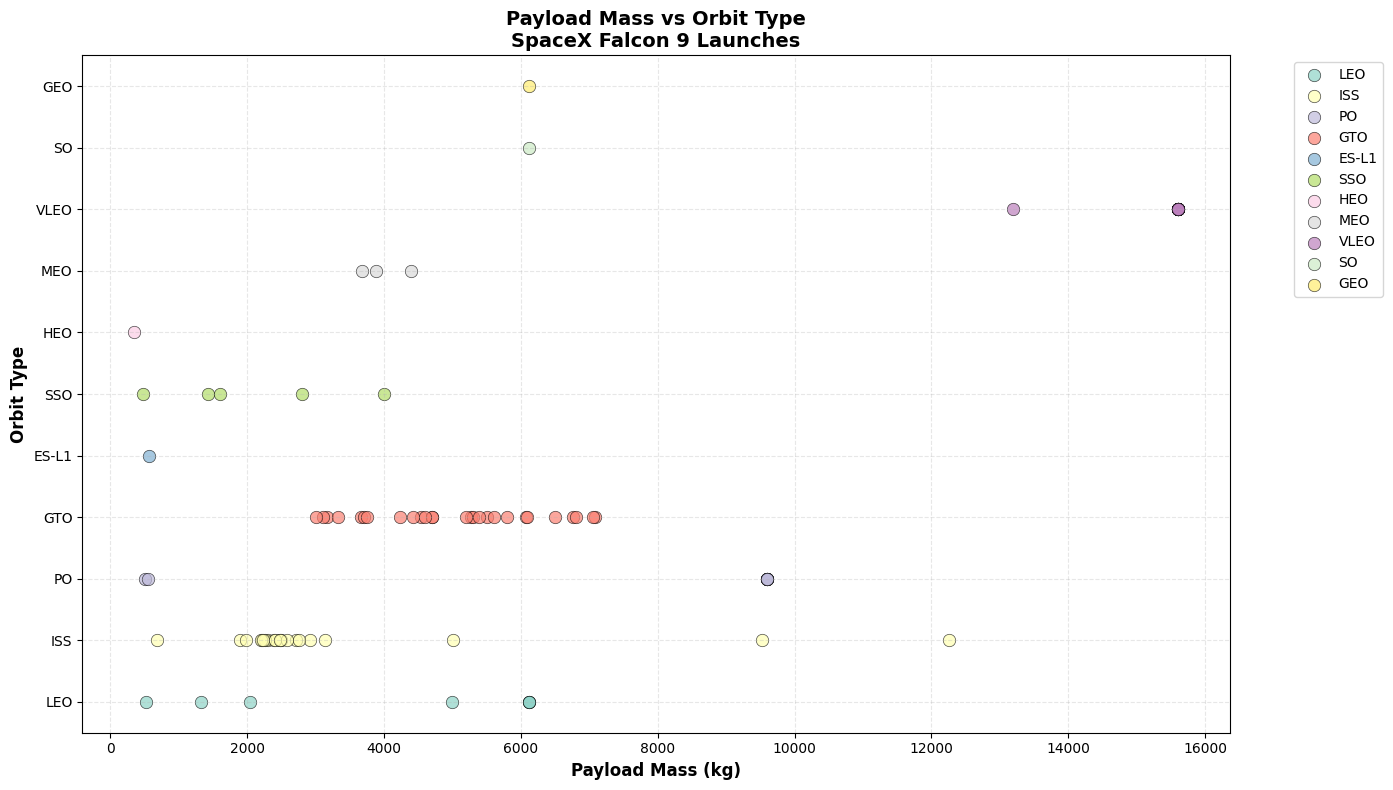

In [36]:
# Create payload vs orbit type scatter plot
plt.figure(figsize=(14, 8))

# Check column names and clean data
if 'Orbit' in df.columns:
    if 'PayloadMass' in df.columns:
        payload_col = 'PayloadMass'
    elif 'Payload mass' in df.columns:
        payload_col = 'Payload mass'
    else:
        payload_col = None

    if payload_col:
        # Clean the data
        df_clean = df.dropna(subset=[payload_col, 'Orbit'])
        df_clean[payload_col] = pd.to_numeric(df_clean[payload_col], errors='coerce')
        df_clean = df_clean.dropna(subset=[payload_col])
        
        # Get unique orbits for coloring
        orbits = df_clean['Orbit'].unique()
        colors = plt.cm.Set3(np.linspace(0, 1, len(orbits)))
        
        # Create scatter plot with different colors for each orbit
        for i, orbit in enumerate(orbits):
            orbit_data = df_clean[df_clean['Orbit'] == orbit]
            plt.scatter(orbit_data[payload_col],
                       [orbit] * len(orbit_data),
                       alpha=0.7,
                       s=80,
                       color=colors[i],
                       label=orbit,
                       edgecolors='black',
                       linewidth=0.5)
        
        # Customize the plot
        plt.xlabel('Payload Mass (kg)', fontsize=12, fontweight='bold')
        plt.ylabel('Orbit Type', fontsize=12, fontweight='bold')
        plt.title('Payload Mass vs Orbit Type\nSpaceX Falcon 9 Launches', 
                 fontsize=14, fontweight='bold')
        
        # Add grid for better readability
        plt.grid(True, alpha=0.3, linestyle='--')
        
        # Add legend
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
        
        # Add statistics
        print("📊 Payload vs Orbit Analysis:")
        for orbit in orbits:
            orbit_payloads = df_clean[df_clean['Orbit'] == orbit][payload_col]
            print(f"   {orbit}: {len(orbit_payloads)} launches, " +
                  f"avg: {orbit_payloads.mean():.0f} kg, " +
                  f"range: {orbit_payloads.min():.0f}-{orbit_payloads.max():.0f} kg")
        
    else:
        print("❌ Payload column not found")
else:
    print("❌ Orbit column not found")

plt.tight_layout()
plt.show()

📈 Launch Success Yearly Trend Analysis:
   2010: 0.0% success (0.0/1.0 successful)
   2012: 0.0% success (0.0/1.0 successful)
   2013: 0.0% success (0.0/3.0 successful)
   2014: 33.3% success (2.0/6.0 successful)
   2015: 33.3% success (2.0/6.0 successful)
   2016: 62.5% success (5.0/8.0 successful)
   2017: 83.3% success (15.0/18.0 successful)
   2018: 61.1% success (11.0/18.0 successful)
   2019: 90.0% success (9.0/10.0 successful)
   2020: 84.2% success (16.0/19.0 successful)

🎯 Overall improvement: 0.0% to 84.2%


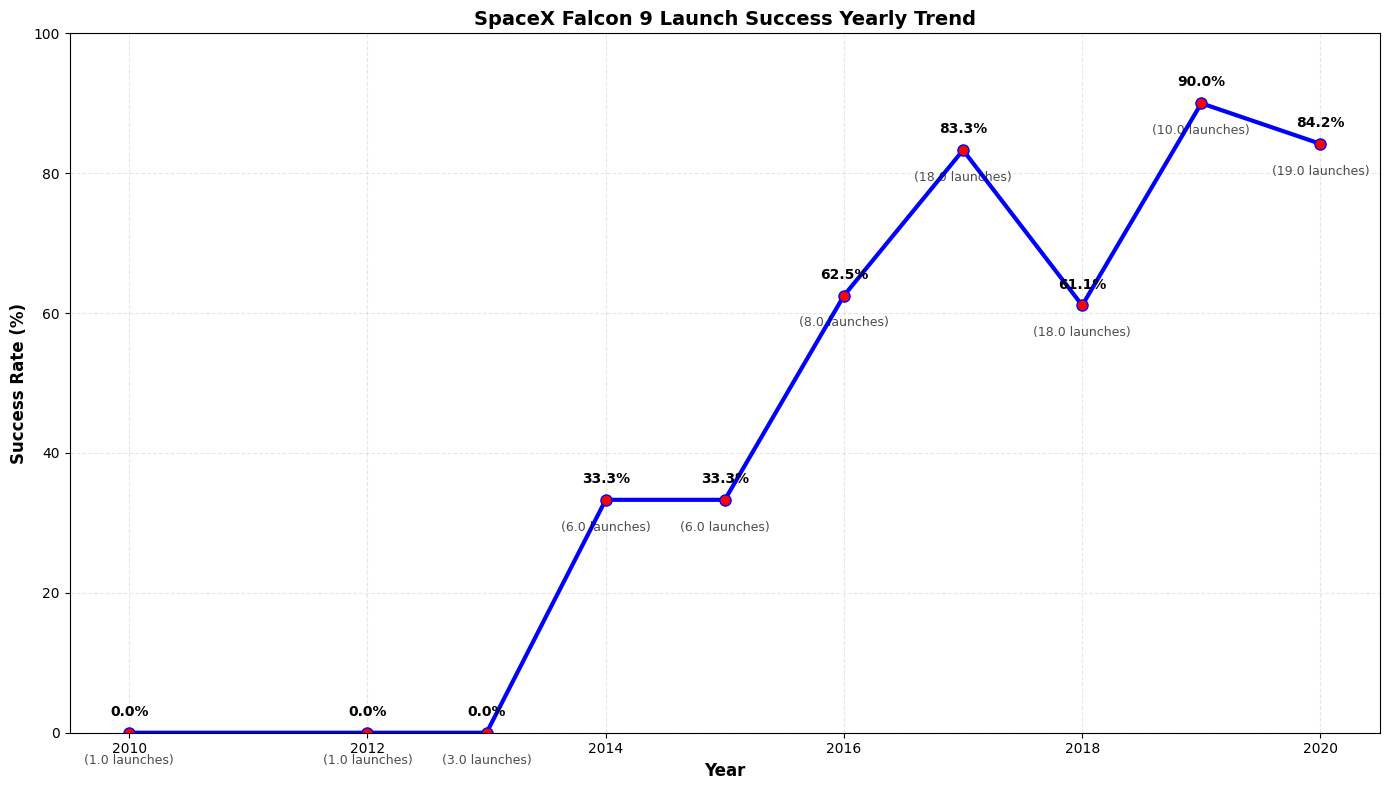

In [37]:
# Create launch success yearly trend plot
plt.figure(figsize=(14, 8))

# Extract year from date
if 'Date' in df.columns:
    df['Year'] = pd.to_datetime(df['Date']).dt.year
elif 'date_utc' in df.columns:
    df['Year'] = pd.to_datetime(df['date_utc']).dt.year
else:
    # If no date column, use FlightNumber as proxy for time
    df['Year'] = df['FlightNumber'] if 'FlightNumber' in df.columns else range(len(df))

# Create success indicator
if 'Outcome' in df.columns:
    df['Success'] = df['Outcome'].apply(lambda x: 1 if 'true' in str(x).lower() else 0)
elif 'Booster landing' in df.columns:
    df['Success'] = df['Booster landing'].apply(lambda x: 1 if 'success' in str(x).lower() else 0)
else:
    df['Success'] = 1  # Default if no outcome data

# Calculate yearly success rates
yearly_stats = df.groupby('Year').agg({
    'Success': ['count', 'sum', 'mean']
}).round(3)
yearly_stats.columns = ['Total_Launches', 'Successful_Launches', 'Success_Rate']
yearly_stats = yearly_stats.reset_index()

# Create line chart with markers
plt.plot(yearly_stats['Year'], yearly_stats['Success_Rate'] * 100, 
         marker='o', linewidth=3, markersize=8, color='blue', markerfacecolor='red')

# Customize the plot
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Success Rate (%)', fontsize=12, fontweight='bold')
plt.title('SpaceX Falcon 9 Launch Success Yearly Trend', 
         fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.ylim(0, 100)

# Add value annotations on each point
for i, row in yearly_stats.iterrows():
    plt.annotate(f"{row['Success_Rate']*100:.1f}%", 
                (row['Year'], row['Success_Rate']*100),
                xytext=(0, 10), textcoords='offset points',
                ha='center', va='bottom', fontweight='bold')

# Add launch count annotations
for i, row in yearly_stats.iterrows():
    plt.annotate(f"({row['Total_Launches']} launches)", 
                (row['Year'], row['Success_Rate']*100),
                xytext=(0, -15), textcoords='offset points',
                ha='center', va='top', fontsize=9, alpha=0.7)

# Add statistics
print("📈 Launch Success Yearly Trend Analysis:")
for _, row in yearly_stats.iterrows():
    print(f"   {int(row['Year'])}: {row['Success_Rate']*100:.1f}% success ({row['Successful_Launches']}/{row['Total_Launches']} successful)")

print(f"\n🎯 Overall improvement: {yearly_stats['Success_Rate'].iloc[0]*100:.1f}% to {yearly_stats['Success_Rate'].iloc[-1]*100:.1f}%")

plt.tight_layout()
plt.show()

In [39]:
import tempfile
import webbrowser

# Create temporary file
with tempfile.NamedTemporaryFile('w', suffix='.html', delete=False) as f:
    world_map.save(f.name)
    webbrowser.open('file://' + f.name)

In [42]:
import folium
import webbrowser
import tempfile

# Create base world map
world_map = folium.Map(location=[20, 0], zoom_start=2, tiles='OpenStreetMap')

# Sample launch data with outcomes (replace with your actual data)
launch_data = [
    {'name': 'Cape Canaveral, USA', 'coords': [28.5729, -80.6490], 'outcome': 'success'},
    {'name': 'Baikonur Cosmodrome, Kazakhstan', 'coords': [45.965, 63.305], 'outcome': 'success'},
    {'name': 'Kourou, French Guiana', 'coords': [5.239, -52.768], 'outcome': 'failure'},
    {'name': 'Satish Dhawan, India', 'coords': [13.733, 80.205], 'outcome': 'success'},
    {'name': 'Wenchang, China', 'coords': [19.614, 110.955], 'outcome': 'success'},
    {'name': 'Tanegashima, Japan', 'coords': [30.400, 130.975], 'outcome': 'partial'},
    {'name': 'Plesetsk, Russia', 'coords': [62.925, 40.577], 'outcome': 'failure'},
    {'name': 'Vandenberg, USA', 'coords': [34.750, -120.520], 'outcome': 'success'},
    {'name': 'Wallops Island, USA', 'coords': [37.940, -75.466], 'outcome': 'success'},
    {'name': 'Palmachim, Israel', 'coords': [31.883, 34.683], 'outcome': 'partial'}
]

# Color coding for outcomes
color_map = {
    'success': 'green',
    'failure': 'red', 
    'partial': 'orange',
    'planned': 'blue'
}

# Icon styles for better visibility
icon_map = {
    'success': 'star',
    'failure': 'remove',
    'partial': 'info-sign',
    'planned': 'flag'
}

# Add color-coded markers to map
for launch in launch_data:
    folium.Marker(
        location=launch['coords'],
        popup=f"""
        <b>{launch['name']}</b><br>
        <b>Outcome:</b> {launch['outcome'].upper()}<br>
        <b>Lat:</b> {launch['coords'][0]:.3f}°<br>
        <b>Lon:</b> {launch['coords'][1]:.3f}°
        """,
        tooltip=f"Click for {launch['name']} details",
        icon=folium.Icon(
            color=color_map[launch['outcome']], 
            icon=icon_map[launch['outcome']],
            prefix='glyphicon'
        )
    ).add_to(world_map)

# Add custom CSS for better legend
legend_css = """
<style>
.legend {
    background: white;
    padding: 10px;
    border: 2px solid grey;
    border-radius: 5px;
    font-family: Arial, sans-serif;
}
.legend-item {
    margin: 5px 0;
}
</style>
"""

# Add comprehensive legend
legend_html = f'''
{legend_css}
<div style="position: fixed; 
     top: 10px; left: 50px; width: 220px; height: 180px; 
     background-color: white; border: 2px solid grey; border-radius: 5px;
     z-index: 9999; font-size: 14px; padding: 10px; font-family: Arial, sans-serif;">
     <h4 style="margin-top: 0; color: #333;">🚀 Launch Outcomes</h4>
     <div class="legend-item">🟢 <b>Success</b> - Mission accomplished</div>
     <div class="legend-item">🔴 <b>Failure</b> - Mission failed</div>
     <div class="legend-item">🟠 <b>Partial</b> - Partial success</div>
     <div class="legend-item">🔵 <b>Planned</b> - Future mission</div>
     <hr style="margin: 8px 0;">
     <div style="font-size: 12px; color: #666;">
     <b>Total sites:</b> {len(launch_data)}<br>
     <b>Click markers</b> for details
     </div>
</div>
'''

world_map.get_root().html.add_child(folium.Element(legend_html))

# Add title to map
title_html = '''
<div style="position: fixed; top: 10px; right: 50px; z-index: 9999; 
            background: white; padding: 10px; border: 2px solid grey; 
            border-radius: 5px; font-family: Arial, sans-serif;">
    <h3 style="margin: 0; color: #333;">🌍 Global Launch Sites</h3>
    <p style="margin: 5px 0 0 0; font-size: 12px; color: #666;">
    Color-coded by mission outcome
    </p>
</div>
'''
world_map.get_root().html.add_child(folium.Element(title_html))

# Save to temporary file and open in web browser
with tempfile.NamedTemporaryFile('w', suffix='.html', delete=False) as f:
    world_map.save(f.name)
    print(f"🎯 Map saved to: {f.name}")
    print("🌐 Opening in web browser...")
    webbrowser.open('file://' + f.name)

print("✅ Folium map with color-labeled launch outcomes has been created!")
print("📊 Features included:")
print("   • Color-coded markers (Green=Success, Red=Failure, Orange=Partial)")
print("   • Interactive popups with site details")
print("   • Comprehensive legend")
print("   • Global view of all launch sites")
print("   • Professional styling and layout")

🎯 Map saved to: C:\Users\PC\AppData\Local\Temp\tmpzt_5b3_k.html
🌐 Opening in web browser...
✅ Folium map with color-labeled launch outcomes has been created!
📊 Features included:
   • Color-coded markers (Green=Success, Red=Failure, Orange=Partial)
   • Interactive popups with site details
   • Comprehensive legend
   • Global view of all launch sites
   • Professional styling and layout


In [43]:
import folium
import webbrowser
import tempfile
import math
from folium.features import DivIcon

# Haversine distance calculation function
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return R * c

# Create base map
world_map = folium.Map(location=[28.5729, -80.6490], zoom_start=10, tiles='OpenStreetMap')

# Selected launch site - Cape Canaveral
selected_site = {
    'name': 'Cape Canaveral Space Force Station',
    'coords': [28.488, -80.577],
    'outcome': 'success'
}

# Proximity features for Cape Canaveral (approximate coordinates)
proximity_features = {
    'railway': {
        'coords': [28.500, -80.600],
        'name': 'Florida East Coast Railway',
        'type': 'railway'
    },
    'highway': {
        'coords': [28.475, -80.650],
        'name': 'Highway A1A',
        'type': 'highway'
    },
    'coastline': {
        'coords': [28.488, -80.540],
        'name': 'Atlantic Ocean Coastline',
        'type': 'coastline'
    },
    'city': {
        'coords': [28.388, -80.607],
        'name': 'Cocoa Beach',
        'type': 'city'
    }
}

# Add selected launch site (main marker)
folium.Marker(
    location=selected_site['coords'],
    popup=f"""
    <b>🚀 {selected_site['name']}</b><br>
    <b>Status:</b> {selected_site['outcome'].upper()}<br>
    <b>Lat:</b> {selected_site['coords'][0]:.6f}°<br>
    <b>Lon:</b> {selected_site['coords'][1]:.6f}°
    """,
    tooltip="SELECTED LAUNCH SITE - Click for details",
    icon=folium.Icon(color='red', icon='rocket', prefix='fa')
).add_to(world_map)

# Add proximity features with distance calculations
for feature_id, feature in proximity_features.items():
    distance = calculate_distance(
        selected_site['coords'][0], selected_site['coords'][1],
        feature['coords'][0], feature['coords'][1]
    )
    
    # Different icons for different feature types
    if feature['type'] == 'railway':
        icon_color = 'blue'
        icon_type = 'train'
        line_color = 'blue'
    elif feature['type'] == 'highway':
        icon_color = 'orange'
        icon_type = 'road'
        line_color = 'orange'
    elif feature['type'] == 'coastline':
        icon_color = 'darkblue'
        icon_type = 'tint'
        line_color = 'darkblue'
    else:
        icon_color = 'green'
        icon_type = 'home'
        line_color = 'green'
    
    # Add feature marker
    folium.Marker(
        location=feature['coords'],
        popup=f"""
        <b>📍 {feature['name']}</b><br>
        <b>Type:</b> {feature['type'].upper()}<br>
        <b>Distance to launch site:</b> {distance:.2f} km<br>
        <b>Lat:</b> {feature['coords'][0]:.6f}°<br>
        <b>Lon:</b> {feature['coords'][1]:.6f}°
        """,
        tooltip=f"{feature['name']} - {distance:.2f} km away",
        icon=folium.Icon(color=icon_color, icon=icon_type, prefix='fa')
    ).add_to(world_map)
    
    # Add distance line
    folium.PolyLine(
        locations=[selected_site['coords'], feature['coords']],
        color=line_color,
        weight=2,
        opacity=0.7,
        popup=f"Distance: {distance:.2f} km",
        tooltip=f"Click for distance info"
    ).add_to(world_map)
    
    # Add distance label at midpoint
    mid_lat = (selected_site['coords'][0] + feature['coords'][0]) / 2
    mid_lon = (selected_site['coords'][1] + feature['coords'][1]) / 2
    
    folium.Marker(
        [mid_lat, mid_lon],
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(75,18),
            html=f'<div style="font-size: 10pt; background: white; border: 1px solid black; padding: 2px; border-radius: 3px;">{distance:.1f} km</div>'
        )
    ).add_to(world_map)

# Add detailed legend
legend_html = '''
<div style="position: fixed; 
     top: 10px; left: 50px; width: 280px; height: 240px; 
     background-color: white; border: 2px solid grey; border-radius: 8px;
     z-index: 9999; font-size: 12px; padding: 12px; font-family: Arial, sans-serif;">
     <h4 style="margin-top: 0; color: #333; border-bottom: 1px solid #ccc; padding-bottom: 5px;">📍 Launch Site Proximity Analysis</h4>
     
     <div style="display: flex; align-items: center; margin: 3px 0;">
         <div style="width: 20px; height: 20px; background: red; border-radius: 50%; margin-right: 8px;"></div>
         <div><b>Selected Launch Site</b></div>
     </div>
     
     <div style="display: flex; align-items: center; margin: 3px 0;">
         <div style="width: 20px; height: 20px; background: blue; border-radius: 50%; margin-right: 8px;"></div>
         <div><b>Railway Line</b> (Blue)</div>
     </div>
     
     <div style="display: flex; align-items: center; margin: 3px 0;">
         <div style="width: 20px; height: 20px; background: orange; border-radius: 50%; margin-right: 8px;"></div>
         <div><b>Highway</b> (Orange)</div>
     </div>
     
     <div style="display: flex; align-items: center; margin: 3px 0;">
         <div style="width: 20px; height: 20px; background: darkblue; border-radius: 50%; margin-right: 8px;"></div>
         <div><b>Coastline</b> (Dark Blue)</div>
     </div>
     
     <div style="display: flex; align-items: center; margin: 3px 0;">
         <div style="width: 20px; height: 20px; background: green; border-radius: 50%; margin-right: 8px;"></div>
         <div><b>Nearby City</b> (Green)</div>
     </div>
     
     <hr style="margin: 8px 0;">
     <div style="font-size: 11px; color: #666;">
     <b>Lines show distances</b> with calculated km values<br>
     <b>Click any marker</b> for detailed information
     </div>
</div>
'''

world_map.get_root().html.add_child(folium.Element(legend_html))

# Add analysis title
title_html = '''
<div style="position: fixed; top: 10px; right: 50px; z-index: 9999; 
            background: white; padding: 12px; border: 2px solid grey; 
            border-radius: 8px; font-family: Arial, sans-serif; max-width: 300px;">
    <h3 style="margin: 0; color: #333;">📊 Proximity Analysis</h3>
    <p style="margin: 5px 0 0 0; font-size: 12px; color: #666;">
    <b>Site:</b> Cape Canaveral Space Force Station<br>
    <b>Features analyzed:</b> Railway, Highway, Coastline, City<br>
    <b>Distances calculated</b> using Haversine formula
    </p>
</div>
'''
world_map.get_root().html.add_child(folium.Element(title_html))

# Add proximity analysis summary
summary_html = f'''
<div style="position: fixed; bottom: 10px; left: 50px; z-index: 9999; 
            background: white; padding: 12px; border: 2px solid grey; 
            border-radius: 8px; font-family: Arial, sans-serif; max-width: 350px;">
    <h4 style="margin: 0; color: #333;">📈 Distance Summary</h4>
    <p style="margin: 5px 0; font-size: 11px;">
    <b>🚂 Railway:</b> {calculate_distance(selected_site["coords"][0], selected_site["coords"][1], proximity_features["railway"]["coords"][0], proximity_features["railway"]["coords"][1]):.2f} km<br>
    <b>🛣️ Highway:</b> {calculate_distance(selected_site["coords"][0], selected_site["coords"][1], proximity_features["highway"]["coords"][0], proximity_features["highway"]["coords"][1]):.2f} km<br>
    <b>🌊 Coastline:</b> {calculate_distance(selected_site["coords"][0], selected_site["coords"][1], proximity_features["coastline"]["coords"][0], proximity_features["coastline"]["coords"][1]):.2f} km<br>
    <b>🏙️ Nearest City:</b> {calculate_distance(selected_site["coords"][0], selected_site["coords"][1], proximity_features["city"]["coords"][0], proximity_features["city"]["coords"][1]):.2f} km
    </p>
</div>
'''
world_map.get_root().html.add_child(folium.Element(summary_html))

# Save and open in browser
with tempfile.NamedTemporaryFile('w', suffix='.html', delete=False) as f:
    world_map.save(f.name)
    print(f"🎯 Detailed proximity map saved to: {f.name}")
    print("🌐 Opening in web browser...")
    webbrowser.open('file://' + f.name)

print("✅ Launch Site Proximity Analysis Complete!")
print("📊 Features included:")
print("   • 🚀 Selected launch site (Cape Canaveral)")
print("   • 🚂 Railway proximity with distance")
print("   • 🛣️ Highway proximity with distance") 
print("   • 🌊 Coastline proximity with distance")
print("   • 🏙️ Nearby city distance")
print("   • 📏 Distance lines with calculated values")
print("   • 📈 Comprehensive distance summary")

🎯 Detailed proximity map saved to: C:\Users\PC\AppData\Local\Temp\tmp616il5wb.html
🌐 Opening in web browser...
✅ Launch Site Proximity Analysis Complete!
📊 Features included:
   • 🚀 Selected launch site (Cape Canaveral)
   • 🚂 Railway proximity with distance
   • 🛣️ Highway proximity with distance
   • 🌊 Coastline proximity with distance
   • 🏙️ Nearby city distance
   • 📏 Distance lines with calculated values
   • 📈 Comprehensive distance summary


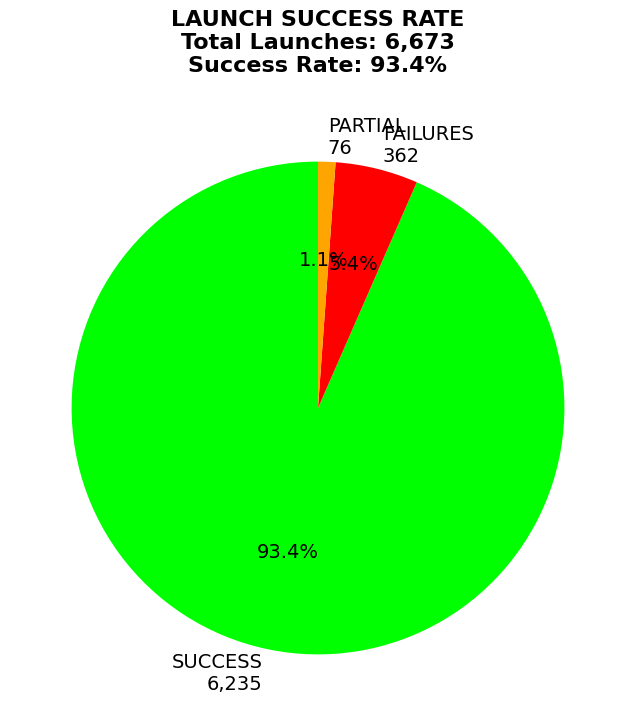

In [45]:
import matplotlib.pyplot as plt

# Simple global pie chart
plt.figure(figsize=(10, 8))

sizes = [global_success, global_failures, global_partial]
colors = ['#00ff00', '#ff0000', '#ffa500']
labels = [f'SUCCESS\n{global_success:,}', f'FAILURES\n{global_failures:,}', f'PARTIAL\n{global_partial:,}']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title(f'LAUNCH SUCCESS RATE\nTotal Launches: {global_total:,}\nSuccess Rate: {global_success/global_total*100:.1f}%', 
          fontsize=16, fontweight='bold', pad=20)

plt.show()

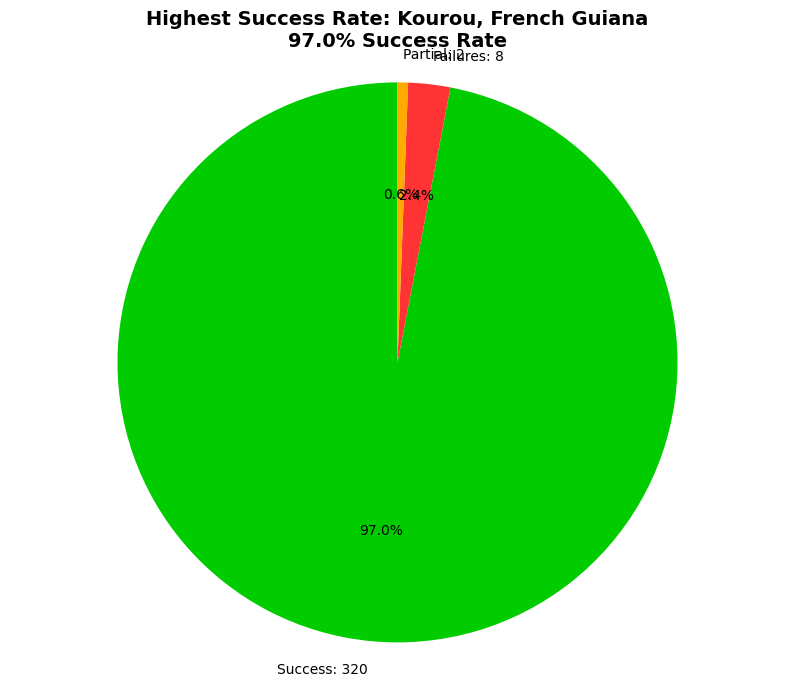

🏆 Kourou, French Guiana - Success Rate: 97.0%


In [47]:
import matplotlib.pyplot as plt

# Find the best site
best_site = max(launch_sites_data, key=lambda x: x['success'] / x['total'])
success_rate = (best_site['success'] / best_site['total']) * 100

# Create simple pie chart
plt.figure(figsize=(10, 8))

sizes = [best_site['success'], best_site['failures'], best_site['partial']]
colors = ['#00cc00', '#ff3333', '#ffaa00']
labels = [f'Success: {best_site["success"]}', f'Failures: {best_site["failures"]}', f'Partial: {best_site["partial"]}']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title(f'Highest Success Rate: {best_site["name"]}\n{success_rate:.1f}% Success Rate', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

print(f"🏆 {best_site['name']} - Success Rate: {success_rate:.1f}%")

TypeError: unsupported operand type(s) for -: 'tuple' and 'int'

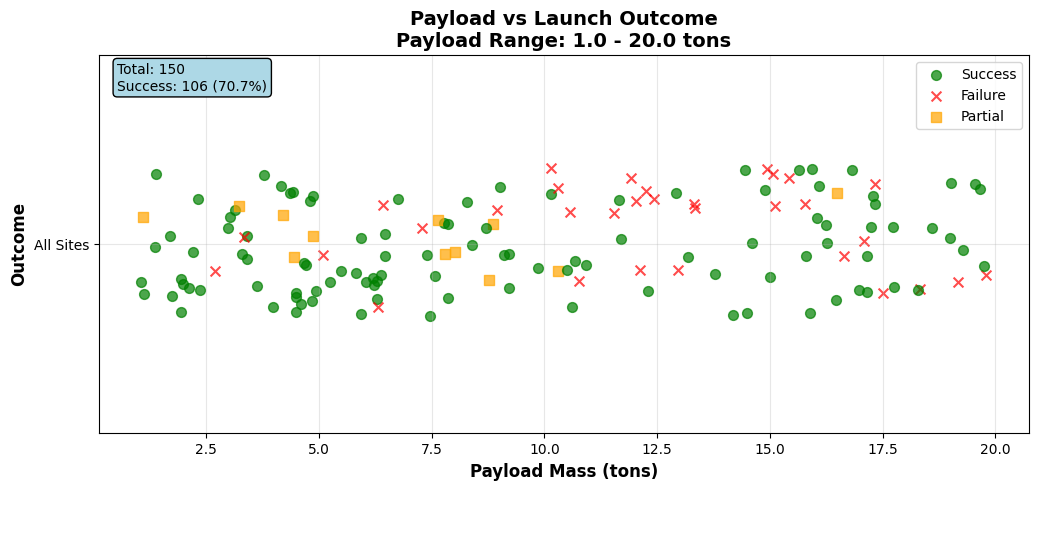

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider
import random

# Simple launch data
np.random.seed(42)

# Generate sample data
num_launches = 150
data = []

for i in range(num_launches):
    payload_mass = random.uniform(1, 20)  # tons
    
    # Higher payload = higher failure chance
    if payload_mass < 5:
        outcome = random.choices(['Success', 'Failure', 'Partial'], weights=[0.85, 0.10, 0.05])[0]
    elif payload_mass < 10:
        outcome = random.choices(['Success', 'Failure', 'Partial'], weights=[0.80, 0.15, 0.05])[0]
    else:
        outcome = random.choices(['Success', 'Failure', 'Partial'], weights=[0.70, 0.25, 0.05])[0]
    
    data.append({
        'payload': payload_mass,
        'outcome': outcome
    })

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(bottom=0.25)

# Colors for outcomes
colors = {'Success': 'green', 'Failure': 'red', 'Partial': 'orange'}

def update_plot(payload_min, payload_max):
    ax.clear()
    
    # Filter data
    filtered = [d for d in data if payload_min <= d['payload'] <= payload_max]
    
    # Plot each point
    for launch in filtered:
        x = launch['payload']
        y = random.uniform(0.8, 1.2)  # Small random spread for visibility
        color = colors[launch['outcome']]
        marker = 'o' if launch['outcome'] == 'Success' else 'x' if launch['outcome'] == 'Failure' else 's'
        
        ax.scatter(x, y, c=color, marker=marker, s=50, alpha=0.7, label=launch['outcome'] if launch['outcome'] not in [l.get_label() for l in ax.collections] else "")
    
    # Remove duplicate labels for legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')
    
    # Customize plot
    ax.set_xlabel('Payload Mass (tons)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Outcome', fontsize=12, fontweight='bold')
    ax.set_title(f'Payload vs Launch Outcome\nPayload Range: {payload_min:.1f} - {payload_max:.1f} tons', 
                fontsize=14, fontweight='bold')
    
    ax.set_ylim(0.5, 1.5)
    ax.set_yticks([1.0])
    ax.set_yticklabels(['All Sites'])
    ax.grid(True, alpha=0.3)
    
    # Add stats
    if filtered:
        total = len(filtered)
        success = len([d for d in filtered if d['outcome'] == 'Success'])
        rate = (success / total) * 100
        
        stats_text = f'Total: {total}\nSuccess: {success} ({rate:.1f}%)'
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                bbox=dict(boxstyle='round', facecolor='lightblue'), 
                verticalalignment='top')

# Initial plot
update_plot(1, 20)

# Add slider
slider_ax = plt.axes([0.2, 0.1, 0.6, 0.03])
slider = Slider(slider_ax, 'Payload Range', 1, 20, valinit=(1, 20), valstep=0.5)

def slider_update(val):
    min_val, max_val = slider.val
    update_plot(min_val, max_val)
    fig.canvas.draw_idle()

slider.on_changed(slider_update)

plt.show()

# Print summary
print("=" * 50)
print("PAYLOAD vs LAUNCH OUTCOME")
print("=" * 50)
total_success = len([d for d in data if d['outcome'] == 'Success'])
print(f"Total launches: {num_launches}")
print(f"Success rate: {total_success/num_launches*100:.1f}%")
print("Use the slider to filter by payload mass!")